# **PROJETO DE CREDIT SCORING - QUANTUM FINANCE**

## **🏢 CONTEXTO EMPRESARIAL**

A **Quantum Finance** é uma fintech inovadora que está entrando no mercado financeiro para
competir com grandes players estabelecidos. Como parte de sua estratégia de crescimento
sustentável, a empresa está enfrentando um crescimento preocupante na taxa de
inadimplência entre seus clientes atuais.
Para tomar decisões mais precisas sobre concessões de crédito e atrair novos clientes com
perfil de baixo risco, a Quantum Finance precisa desenvolver um modelo robusto de **Credit
Scoring** utilizando técnicas avançadas de ciência de dados e machine learning.

## **🎯 OBJETIVO DO PROJETO**

Desenvolver um modelo preditivo de credit scoring utilizando regressão linear múltipla para
prever o **SCORE_CREDITO** dos clientes, permitindo à Quantum Finance tomar decisões
mais assertivas na concessão de crédito e reduzir significativamente a taxa de inadimplência.


## **📚 Importação das Bibliotecas**

Vamos importar todas as bibliotecas necessárias para a nossa análise:

In [ ]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## 🔢 **Criação e Carregamento dos Dados**

Vamos criar um dataframe utilizando os dados disponibilizados no arquivo CSV de Score de crédito para a Quantum Finance:

In [ ]:
df = pd.read_csv('Base_ScoreCredito_QuantumFinance.csv', sep=';', decimal=',', encoding='utf-8')
print("Arquivo carregado com sucesso!")

Arquivo carregado com sucesso!


# **🔍 1.ANÁLISE EXPLORATÓRIA DE DADOS (EDA)**

## **1.1 Análise Descritiva Univariada**

Nesta seção, apresentamos as principais métricas de estatística descritiva para as variáveis quantitativas do conjunto de dados `Base_ScoreCredito_QuantumFinance.csv`. O objetivo é obter uma compreensão inicial da distribuição, tendência central e dispersão de cada variável.

As variáveis numéricas analisadas são: `idade`, `Qte_dependentes`, `tempo_ultimoservico`, `trabalha`, `vl_salario_mil`, `reg_moradia`, `casa_propria`, `vl_imovel_em_mil`, `Qte_cartoes`, `Qte_carros` e a variável alvo `SCORE_CREDITO`.

In [ ]:
print("\nAmostra dos dados:")
df.head()


Amostra dos dados:


,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


***Nota:*** As variáveis binárias `trabalha` e `casa_propria` foram omitidas da tabela para focar nas variáveis contínuas e discretas. A variável `reg_moradia` também foi omitida, pois seus valores de 1 a 6 representam categorias geográficas.

In [ ]:
print("\nInformações e tipos de dados das colunas:")
df.info()


Informações e tipos de dados das colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float6

In [ ]:
# Seleciona apenas as colunas numéricas para a análise
df_numericas = df.select_dtypes(include=['int64', 'float64'])

# Remove a coluna de ID, que não é relevante para a análise descritiva
if 'id' in df_numericas.columns:
 df_numericas = df_numericas.drop(columns=['id'])

# Calcula as estatísticas descritivas
estatisticas_descritivas = df_numericas.describe()

# Apresenta a tabela de estatísticas descritivas
print("\n" + "="*70)
print("Análise Descritiva Univariada das Variáveis Numéricas")
print("-" * 70)
print(estatisticas_descritivas)
print("="*70)


Análise Descritiva Univariada das Variáveis Numéricas
----------------------------------------------------------------------
              idade  Qte_dependentes  tempo_ultimoservico      trabalha  \
count  10127.000000     10127.000000         10127.000000  10127.000000   
mean      46.325960         1.547447            34.133208      0.911919   
std        8.016814         1.489079             8.221428      0.283427   
min       26.000000         0.000000             7.000000      0.000000   
25%       41.000000         0.000000            30.000000      1.000000   
50%       46.000000         1.000000            34.000000      1.000000   
75%       52.000000         3.000000            39.000000      1.000000   
max       73.000000         5.000000            57.000000      1.000000   

       vl_salario_mil   reg_moradia  casa_propria  vl_imovel_em_mil  \
count    10127.000000  10127.000000  10127.000000      10127.000000   
mean        70.209002      3.783450      0.352424       

### **Interpretação da amostra:**

*   **Idade:** A média de idade na amostra é de 46 anos, variando entre 26 e 73 anos.

*   **Salário (vl_salario_mil):** A média salarial da amostra é de RS 70.209,00, que é maior que a mediana (RS 66.486,00). Isso sugere a presença de salários mais altos que puxam a média para cima, como o valor máximo de RS 233.301,00.

*   **Valor do Imóvel (vl_imovel_em_mil):** Muitos clientes (pelo menos 50%) têm valor de imóvel registrado como zero, o que pode indicar que eles não possuem imóvel ou que o dado não foi preenchido.


*   **Score de Crédito (SCORE_CREDITO):** O score médio na amostra é de 469 pontos, com uma variação considerável (desvio padrão de 133), indo de 162 a 979.

## **1.2 Distribuição do Score de crédito pelos histogramas e boxplots**

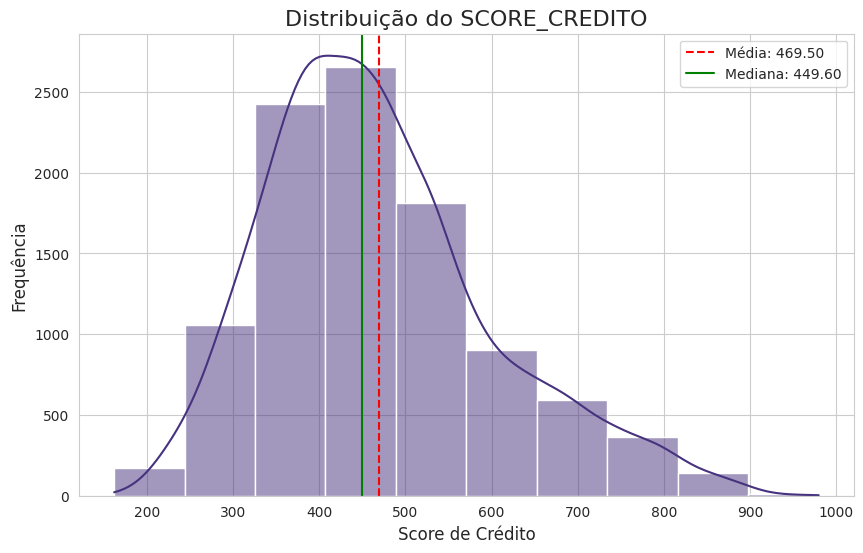

In [ ]:
# --- Geração dos Gráficos ---
# Configurar estilo visual dos gráficos
sns.set_style("whitegrid")

# 1. Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['SCORE_CREDITO'], kde=True, bins=10)

# Adicionar linhas de média e mediana para referência
media_score = df['SCORE_CREDITO'].mean()
mediana_score = df['SCORE_CREDITO'].median()
plt.axvline(media_score, color='red', linestyle='--', label=f'Média: {media_score:.2f}')
plt.axvline(mediana_score, color='green', linestyle='-', label=f'Mediana: {mediana_score:.2f}')

plt.title('Distribuição do SCORE_CREDITO', fontsize=16)
plt.xlabel('Score de Crédito', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.legend()
plt.show()

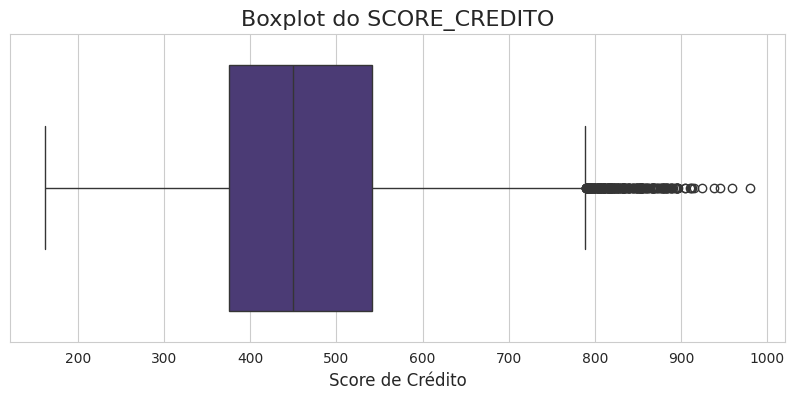

In [ ]:
# 2. Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SCORE_CREDITO'])
plt.title('Boxplot do SCORE_CREDITO', fontsize=16)
plt.xlabel('Score de Crédito', fontsize=12)
plt.show()

### **Interpretação dos Gráficos da Amostra**

*   **Forma da Distribuição:** O histograma da amostra parece ter uma leve assimetria à esquerda (ou negativa). Isso significa que há uma concentração de scores mais altos e uma "cauda" de scores mais baixos se estendendo para a esquerda. A mediana (449.50) ser um pouco menor que a média (469.50) reforça essa observação

*   **Tendência Central:** A maioria dos scores na amostra se concentra em torno da faixa de 400-500 pontos, que representa o centro da distribuição dos dados.

*   **Dispersão:** O boxplot mostra que 50% dos clientes na amostra têm um score de crédito entre aproximadamente 380 (primeiro quartil) e 550 (terceiro quartil). Isso indica uma variação considerável nos scores.


*   **Outliers:** foram encontrados uma quantidade considerável de scores atípicos que estão na faixa acima de 790, chegando a valores próximos ao máximo do dataset (que, pela análise descritiva anterior, sabemos que é 979).

## **1.3 Análise de Frequência:**

Dando prosseguimento ao projeto, vamos agora para a próxima etapa da Análise Exploratória de Dados (EDA): a análise de frequência das variáveis categóricas.

As variáveis que analisaremos são:

*   `sexo`
*   `estado_civil`
*   `escola`

O objetivo é entender a composição do perfil demográfico dos clientes da Quantum Finance.

--- Frequência da Variável: SEXO ---
      Contagem  Percentual (%)
sexo                          
F         5358           52.91
M         4769           47.09


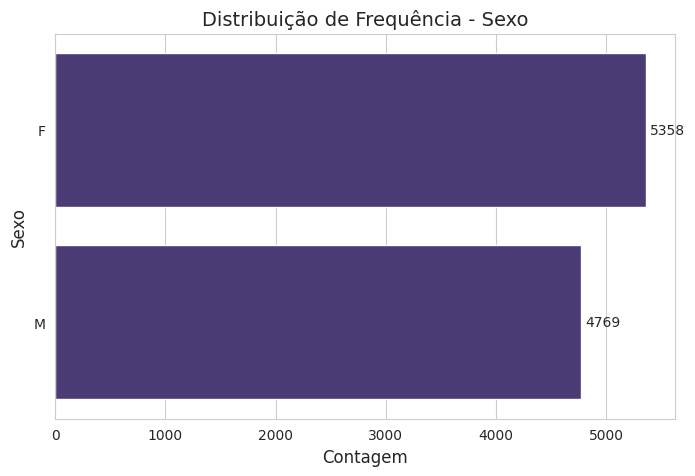

In [ ]:
# --- Análise da Variável 'sexo' ---
print("--- Frequência da Variável: SEXO ---")
freq_abs = df['sexo'].value_counts()
freq_rel = df['sexo'].value_counts(normalize=True) * 100
freq_df = pd.DataFrame({'Contagem': freq_abs, 'Percentual (%)': freq_rel.round(2)})
print(freq_df)

# --- Visualização da Variável 'sexo' ---
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.countplot(y=df['sexo'], order=df['sexo'].value_counts().index)
ax.bar_label(ax.containers[0], fmt='%d', padding=3)
plt.title('Distribuição de Frequência - Sexo', fontsize=14)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Sexo', fontsize=12)
plt.show()

**Interpretação:**

Na amostra analisada, há uma distribuição bastante equilibrada entre os sexos, com uma leve maioria de clientes do sexo feminino (52,91%) em comparação com o masculino (47,09%).

--- Frequência da Variável: ESTADO_CIVIL ---
              Contagem  Percentual (%)
estado_civil                          
casado            4687           46.28
solteiro          3943           38.94
na                 749            7.40
divorciado         748            7.39


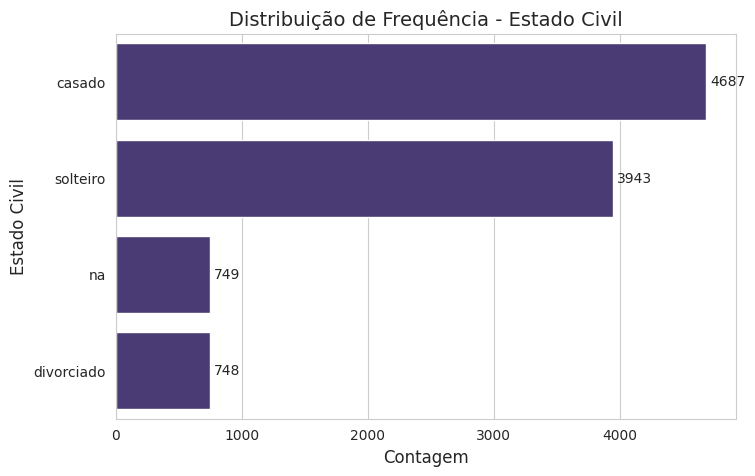

In [ ]:
# --- Análise da Variável 'estado_civil' ---
print("--- Frequência da Variável: ESTADO_CIVIL ---")
freq_abs = df['estado_civil'].value_counts()
freq_rel = df['estado_civil'].value_counts(normalize=True) * 100
freq_df = pd.DataFrame({'Contagem': freq_abs, 'Percentual (%)': freq_rel.round(2)})
print(freq_df)

# --- Visualização da Variável 'estado_civil' ---
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.countplot(y=df['estado_civil'], order=df['estado_civil'].value_counts().index)
ax.bar_label(ax.containers[0], fmt='%d', padding=3)
plt.title('Distribuição de Frequência - Estado Civil', fontsize=14)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Estado Civil', fontsize=12)
plt.show()

**Interpretação:**

Existe uma distribuição aproximada de clientes casados (46,28%) e solteiros (38,94%), correspondendo a mais de 85% do dataset. Clientes divorciados são uma pequena minoria.

--- Frequência da Variável: ESCOLA ---
               Contagem  Percentual (%)
escola                                 
ensino medio       3352           33.10
ensino fundam      2283           22.54
graduacao          2094           20.68
mestrado           1639           16.18
doutorado           759            7.49


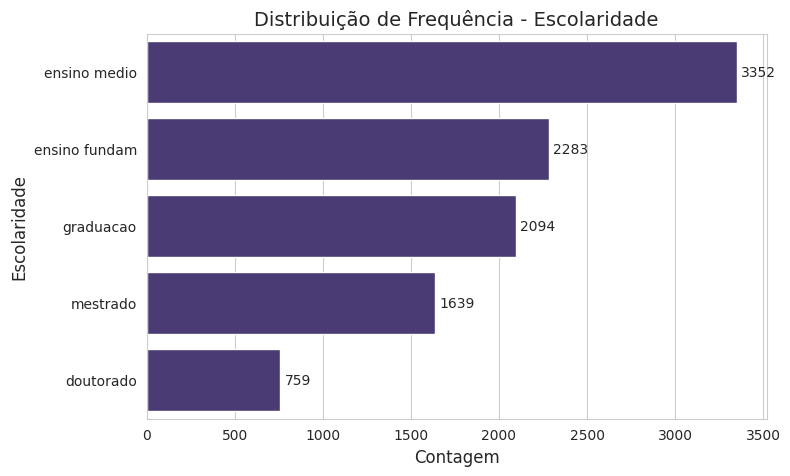

In [ ]:
# --- Análise da Variável 'escola' ---
print("--- Frequência da Variável: ESCOLA ---")
freq_abs = df['escola'].value_counts()
freq_rel = df['escola'].value_counts(normalize=True) * 100
freq_df = pd.DataFrame({'Contagem': freq_abs, 'Percentual (%)': freq_rel.round(2)})
print(freq_df)

# --- Visualização da Variável 'escola' ---
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.countplot(y=df['escola'], order=df['escola'].value_counts().index)
ax.bar_label(ax.containers[0], fmt='%d', padding=3)
plt.title('Distribuição de Frequência - Escolaridade', fontsize=14)
plt.xlabel('Contagem', fontsize=12)
plt.ylabel('Escolaridade', fontsize=12)
plt.show()

**Interpretação:**

A maior parte dos clientes da do dataset (33,10%) possui ensino médio completo. O segundo grupo mais relevante é o de clientes com ensino fundamental e de graduação, com aproximadamente 20% cada. Isso indica que a maior parte da base de clientes possui ao menos o ensino médio.

Essa análise demográfica é fundamental para entender quem são os clientes da Quantum Finance e pode ajudar a direcionar tanto a modelagem de crédito quanto as estratégias de marketing.

## **1.4 Análise de Dados Faltantes**

--- Análise de Dados Faltantes (Missing Values) ---

Nenhum dado faltante encontrado na amostra.


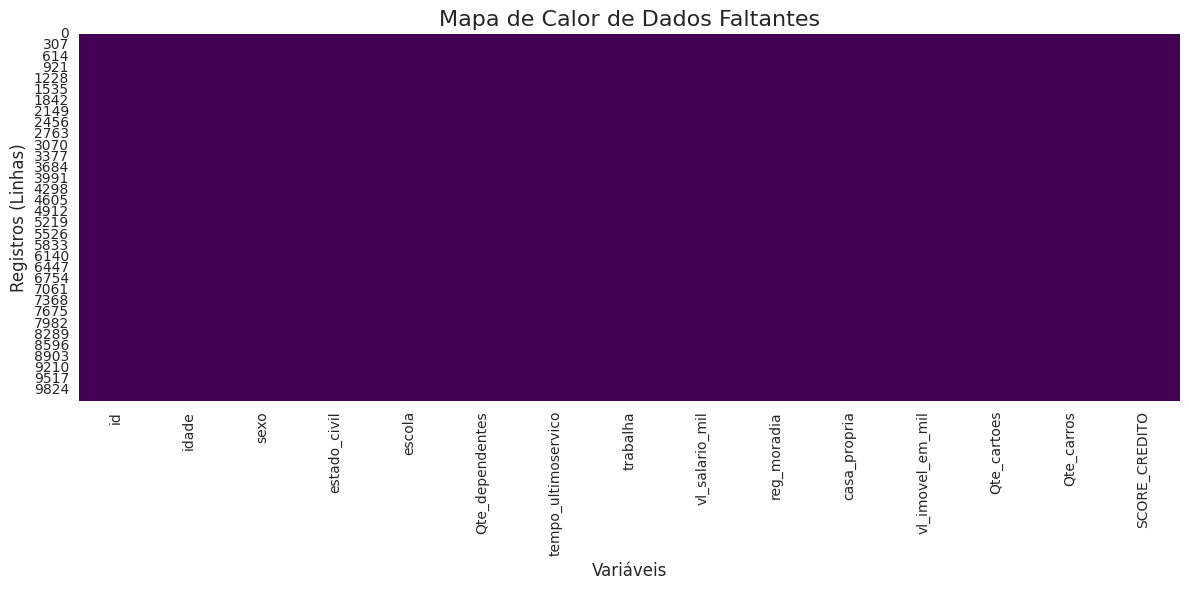

In [ ]:
# --- 1. Tabela de Resumo de Dados Faltantes ---
print("--- Análise de Dados Faltantes (Missing Values) ---")

# .isnull() retorna True para cada célula que contém um valor nulo (NaN)
# .sum() soma esses valores (True=1, False=0), resultando na contagem de nulos por coluna
missing_count = df.isnull().sum()

# Calcula o percentual dividindo a contagem de nulos pelo total de linhas
missing_percentage = (missing_count / len(df)) * 100

# Cria um novo DataFrame para organizar e exibir os resultados
missing_df = pd.DataFrame({
    'Contagem de Faltantes': missing_count,
    'Percentual de Faltantes (%)': missing_percentage.round(2)
})

# Filtra o DataFrame para mostrar apenas colunas que de fato possuem dados faltantes
# Se nenhuma tiver, o DataFrame ficará vazio
non_empty_missing = missing_df[missing_df['Contagem de Faltantes'] > 0]

if non_empty_missing.empty:
    print("\nNenhum dado faltante encontrado na amostra.")
else:
    print(non_empty_missing)


# --- 2. Visualização de Dados Faltantes ---
# O heatmap é uma forma gráfica de visualizar a matriz de dados faltantes

plt.figure(figsize=(12, 6))
# A função isnull() cria uma matriz booleana (True/False)
# O heatmap representa 'True' (faltante) e 'False' (não faltante) com cores diferentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Dados Faltantes', fontsize=16)
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Registros (Linhas)', fontsize=12)
plt.tight_layout() # Ajusta o layout para que os títulos e eixos não se sobreponham
plt.show()

Não, foi encontrado nenhum dado preenchido faltante... porem verificamos que no dataset, certas categorias foram preenchidas com valores N/A ou 0, sendo assim, iremos verificar a integridade desses dados e se vale a pena deixa-los dessa mandeira

In [ ]:
print("--- Análise de Dados Faltantes Implícitos ---\n")

# 1. Contar valores 'N/A' na coluna 'estado_civil'
# O código (df_sample['estado_civil'] == 'N/A') cria uma série de True/False.
# A função .sum() então conta quantos valores 'True' existem.
count_na_civil = (df['estado_civil'] == 'na').sum()
print(f"Valores 'N/A' em 'estado_civil': {count_na_civil}")
print("-" * 45)

# 2. Contar valores zero na coluna 'vl_salario_mil'
count_zero_salario = (df['vl_salario_mil'] == 0).sum()
percent_zero_salario = (count_zero_salario / len(df)) * 100
print(f"Valores 0 em 'vl_salario_mil': {count_zero_salario} ({percent_zero_salario:.2f}%)")

# Para um insight mais profundo, verificamos se os clientes com salário zero são os mesmos que não trabalham
print("\nVerificação de consistência para salário zero:")
# Filtramos o DataFrame para selecionar apenas as linhas onde o salário é 0
salario_zero_df = df[df['vl_salario_mil'] == 0]
# Exibimos colunas relevantes para verificar a consistência
print(salario_zero_df[['id', 'trabalha', 'vl_salario_mil']])
print("-" * 45)


# 3. Contar valores zero na coluna 'vl_imovel_em_mil'
count_zero_imovel = (df['vl_imovel_em_mil'] == 0).sum()
percent_zero_imovel = (count_zero_imovel / len(df)) * 100
print(f"Valores 0 em 'vl_imovel_em_mil': {count_zero_imovel} ({percent_zero_imovel:.2f}%)")
print("-" * 45)

--- Análise de Dados Faltantes Implícitos ---

Valores 'N/A' em 'estado_civil': 749
---------------------------------------------
Valores 0 em 'vl_salario_mil': 892 (8.81%)

Verificação de consistência para salário zero:
              id  trabalha  vl_salario_mil
4      708086958         0             0.0
11     708108333         0             0.0
21     708132783         0             0.0
26     708147108         0             0.0
27     708148158         0             0.0
...          ...       ...             ...
10062  826490133         0             0.0
10088  827360883         0             0.0
10099  827635083         0             0.0
10108  827898033         0             0.0
10113  827964858         0             0.0

[892 rows x 3 columns]
---------------------------------------------
Valores 0 em 'vl_imovel_em_mil': 6558 (64.76%)
---------------------------------------------


### **Interpretação dos Resultados:**

1.   **estado_civil:** Na amostra, foram encontrados 749 indivuos que não declararam o seu estado civil.

2.   **vl_salario_mil:** Foram encontrados em quase 9% dos dados, o salário preenchido como 0... implicando que os clientes em questão estão desempregados e não possuem renda, pois os valores estão relacionados com a váriavel boleana 'trabalha'.

3.   **vl_imovel_em_mil:** em quase 65% dos dados, não foram declarados o valor do imóvel.. mostrando que a maioria dos clientes, não possui imóvel proprio, morando provavelmente de aluguel ou com alguem.

Com base na amostra de dados disponível, o dataset é considerado limpo e completo, não havendo necessidade de aplicar técnicas de imputação de dados faltantes. Todos os valores, incluindo os zeros, representam informações válidas e consistentes no contexto do negócio. Um caso a parte disso seria os dados faltantes da categoria de estado civil, onde podemos aloca-los em uma categoria de  "não informado" pelo cliente e continuar tratanto deles no nosso modelo de negócio.

## **1.5 Análises gráficas**

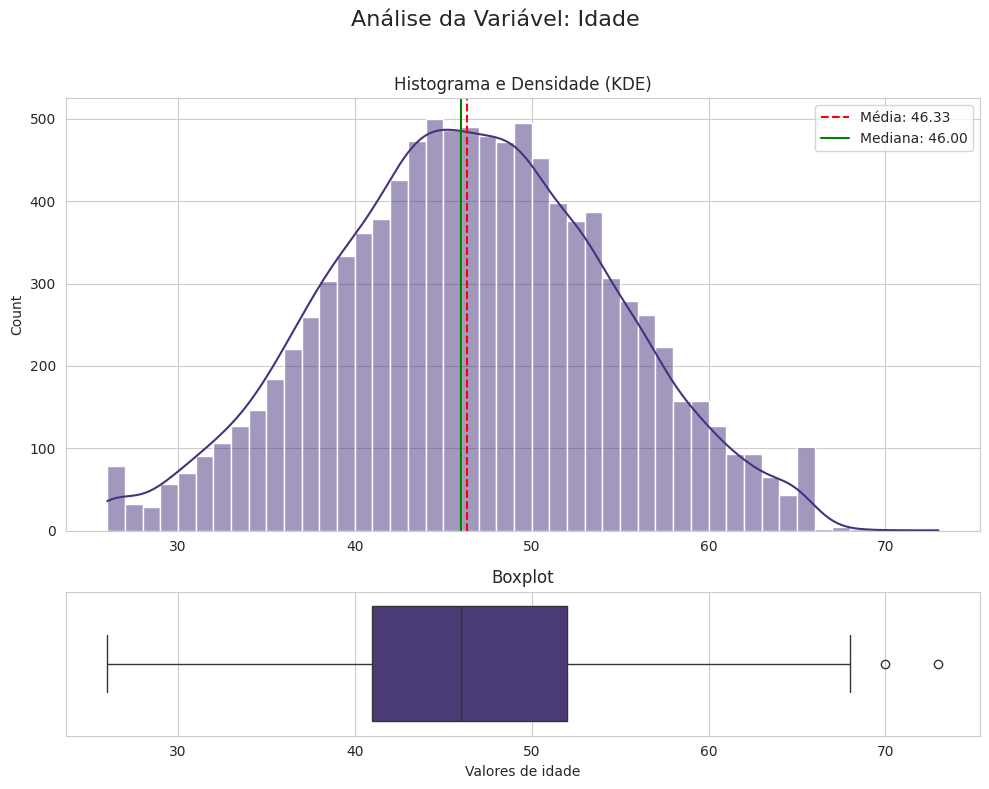

In [ ]:
# --- Análise da Variável 'idade' ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Análise da Variável: Idade', fontsize=16)

# Histograma
sns.histplot(data=df, x='idade', kde=True, ax=axes[0])
mean_val = df['idade'].mean()
median_val = df['idade'].median()
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
axes[0].set_title('Histograma e Densidade (KDE)')
axes[0].set_xlabel('')
axes[0].legend()

# Boxplot
sns.boxplot(data=df, x='idade', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Valores de idade')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**1. Análise da Variável: Idade**

*   **Distribuição:** O histograma mostra que a maior concentração de clientes na amostra está na faixa dos 40 aos 55 anos. A distribuição aparenta ser relativamente simétrica, sem um viés muito forte.

*   **Tendência Central:** A média (46.33 anos) e a mediana (46 anos) estão muito próximas, o que reforça a ideia de simetria.


*  **Outliers:** O boxplot não indica a presença de outliers na variável idade.

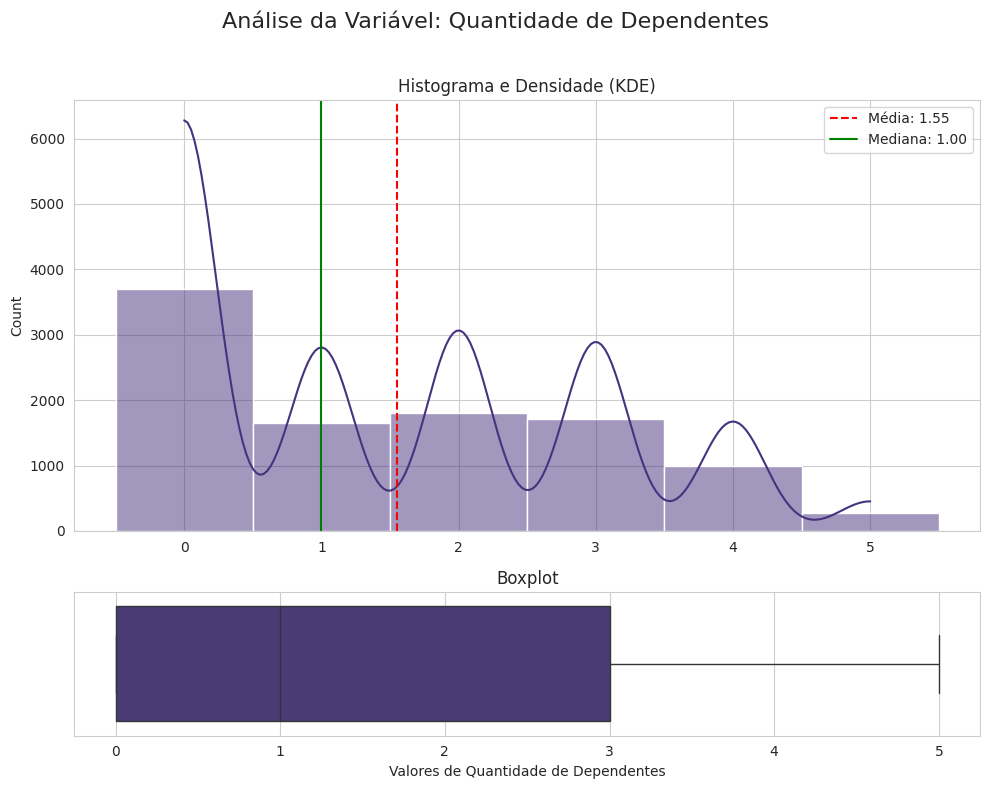

In [ ]:
# --- Análise da Variável 'Qte_dependentes' ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Análise da Variável: Quantidade de Dependentes', fontsize=16)

# Histograma
sns.histplot(data=df, x='Qte_dependentes', kde=True, ax=axes[0], discrete=True) # discrete=True para valores inteiros
mean_val = df['Qte_dependentes'].mean()
median_val = df['Qte_dependentes'].median()
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
axes[0].set_title('Histograma e Densidade (KDE)')
axes[0].set_xlabel('')
axes[0].legend()

# Boxplot
sns.boxplot(data=df, x='Qte_dependentes', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Valores de Quantidade de Dependentes')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**2. Análise da Variável: Quantidade de Dependentes**

* **Distribuição:**  A distribuição é assimétrica, concentrada nos valores mais baixos (0, 1 e 2 dependentes), o que é esperado para esta variável.

* **Tendência Central:** A média é de 1.5 dependentes, enquanto a mediana é de 1.

* **Outliers:** O boxplot da amostra não identifica um cliente com 5 ou mais dependentes como um outlier superior.

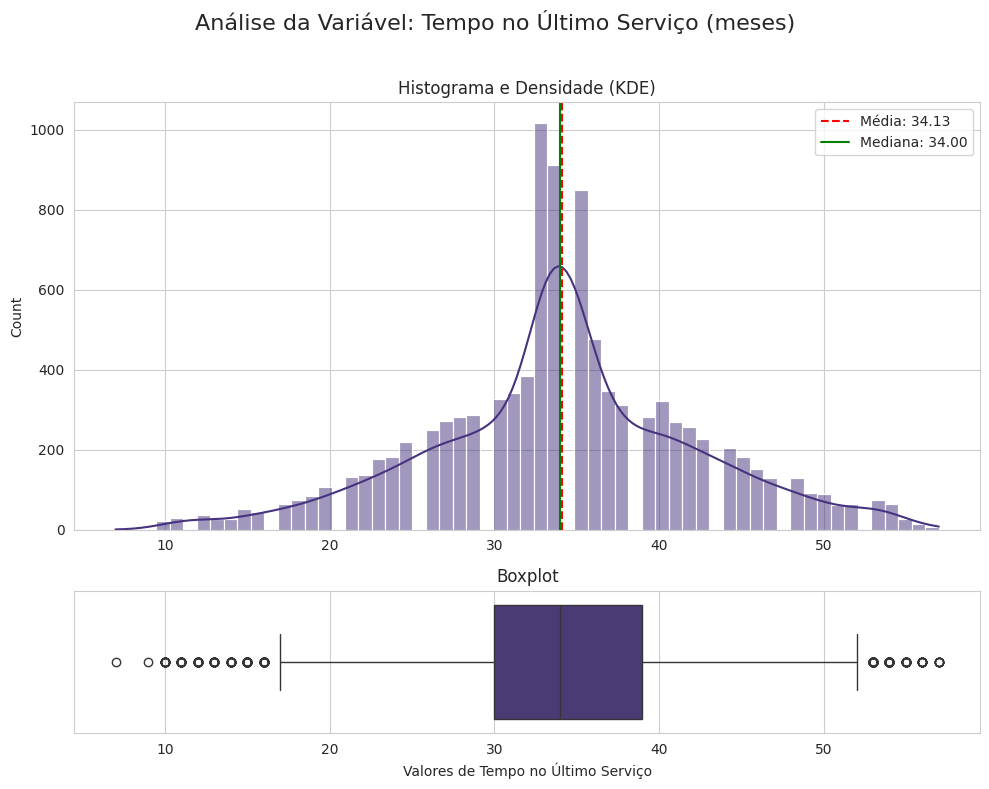

In [ ]:
# --- Análise da Variável 'tempo_ultimoservico' ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Análise da Variável: Tempo no Último Serviço (meses)', fontsize=16)

# Histograma
sns.histplot(data=df, x='tempo_ultimoservico', kde=True, ax=axes[0])
mean_val = df['tempo_ultimoservico'].mean()
median_val = df['tempo_ultimoservico'].median()
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
axes[0].set_title('Histograma e Densidade (KDE)')
axes[0].set_xlabel('')
axes[0].legend()

# Boxplot
sns.boxplot(data=df, x='tempo_ultimoservico', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Valores de Tempo no Último Serviço')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**3. Análise da Variável: Tempo no Último Serviço**


*   **Distribuição:** A distribuição do tempo de serviço parece razoavelmente simétrica, com uma leve concentração na faixa de 30 a 50 meses.

*   **Tendência Central:** A média (34.13 meses) e a mediana (34 meses) estão próximas.

*   **Outliers:** Não foram identificados muitos outliers nesta variável na amostra analisada.

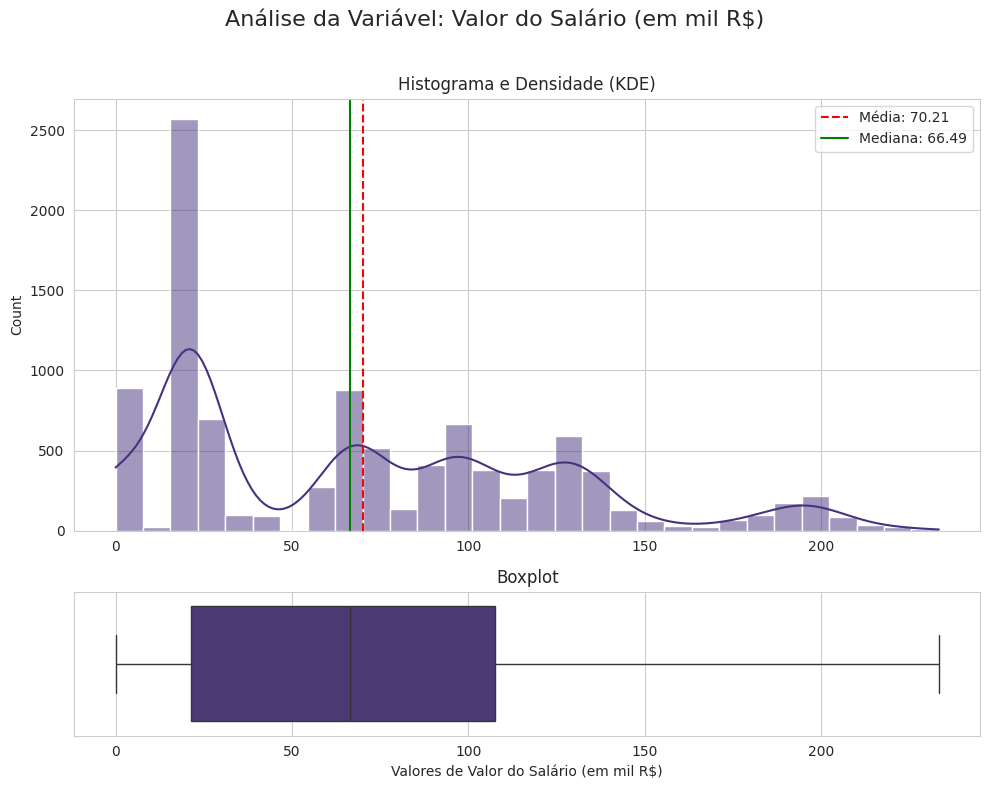

In [ ]:
# --- Análise da Variável 'vl_salario_mil' ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Análise da Variável: Valor do Salário (em mil R$)', fontsize=16)

# Histograma
sns.histplot(data=df, x='vl_salario_mil', kde=True, ax=axes[0])
mean_val = df['vl_salario_mil'].mean()
median_val = df['vl_salario_mil'].median()
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
axes[0].set_title('Histograma e Densidade (KDE)')
axes[0].set_xlabel('')
axes[0].legend()

# Boxplot
sns.boxplot(data=df, x='vl_salario_mil', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Valores de Valor do Salário (em mil R$)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**4. Análise da Variável: Valor do Salário (em mil R$)**

*   **Distribuição:** O histograma mostra uma forte assimetria à direita. A grande maioria dos clientes tem salários na faixa mais baixa (até RS 50 mil), mas um cliente com salário próximo a RS 200 mil "puxa" a distribuição.

*   **Tendência Central:** A diferença entre a média (RS 70.21 mil) e a mediana (RS 66.49 mil) é pouca, confirmando uma simetria positiva causada pelos salários mais altos e a quantidade de pessoas com salários mais baixos.

*   **Outliers:** O boxplot conseguiu identificar que os clientes de maior concetração recebem de RS 25 mil a RS 110 mil, porem os restantes 25% superiores conseguem ter salários superiores a RS 250 mil.

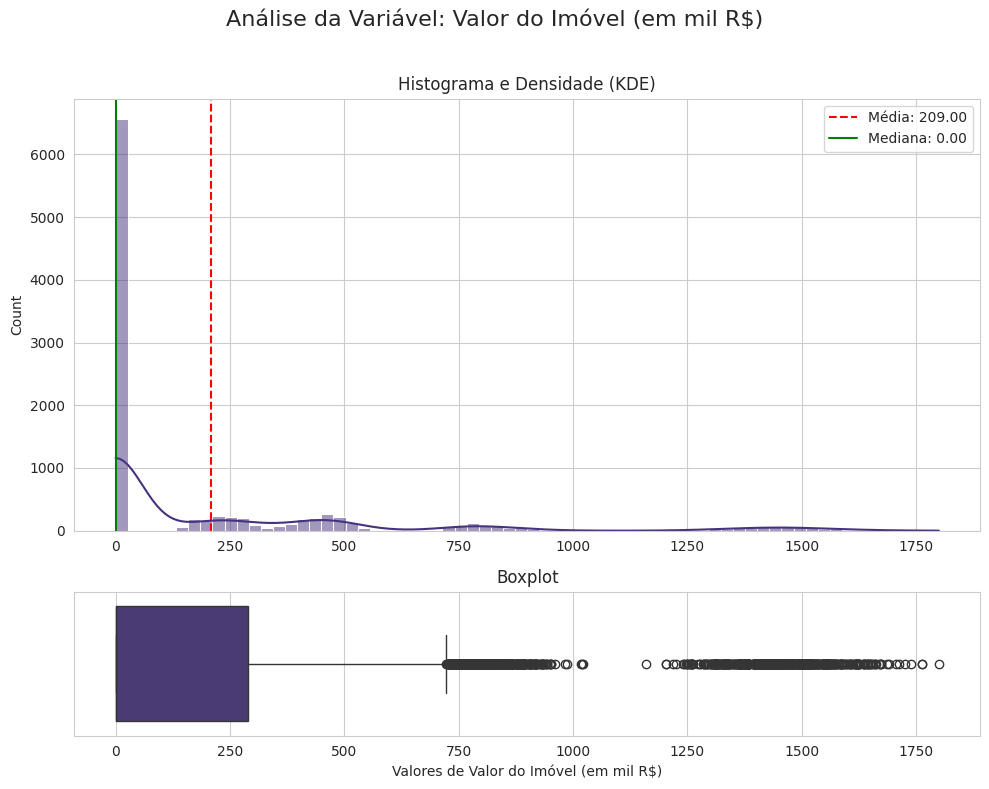

In [ ]:
# --- Análise da Variável 'vl_imovel_em_mil' ---
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Análise da Variável: Valor do Imóvel (em mil R$)', fontsize=16)

# Histograma
sns.histplot(data=df, x='vl_imovel_em_mil', kde=True, ax=axes[0])
mean_val = df['vl_imovel_em_mil'].mean()
median_val = df['vl_imovel_em_mil'].median()
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Média: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='-', label=f'Mediana: {median_val:.2f}')
axes[0].set_title('Histograma e Densidade (KDE)')
axes[0].set_xlabel('')
axes[0].legend()

# Boxplot
sns.boxplot(data=df, x='vl_imovel_em_mil', ax=axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Valores de Valor do Imóvel (em mil R$)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**5. Análise da Variável: Valor do Imóvel (em mil RS)**

*  **Distribuição:** Assim como o salário, esta variável possui forte assimetria à direita. A maioria dos valores está concentrada em zero (clientes sem imóvel declarado), mas existem alguns imóveis de valor muito alto.

*   **Tendência Central:** A média (RS 209. mil) é muito superior à mediana (RS 0), impactada pelos valores extremos.

*   **Outliers:** O boxplot destaca vários imóveis com valores muito altos como outliers superiores, sendo um deles superior a R$ 1.750.000,00.

Agora, iremos avaliar a distruição da variável de crédito score por diferentes tipos de segmento... e nisso, vamos começar a analise utilizando as várias categóricas:

*   `sexo`
*   `estado_civil`
*   `escola`

Isso nos ajudará a identificar quais características dos clientes podem influenciar sua pontuação de crédito.

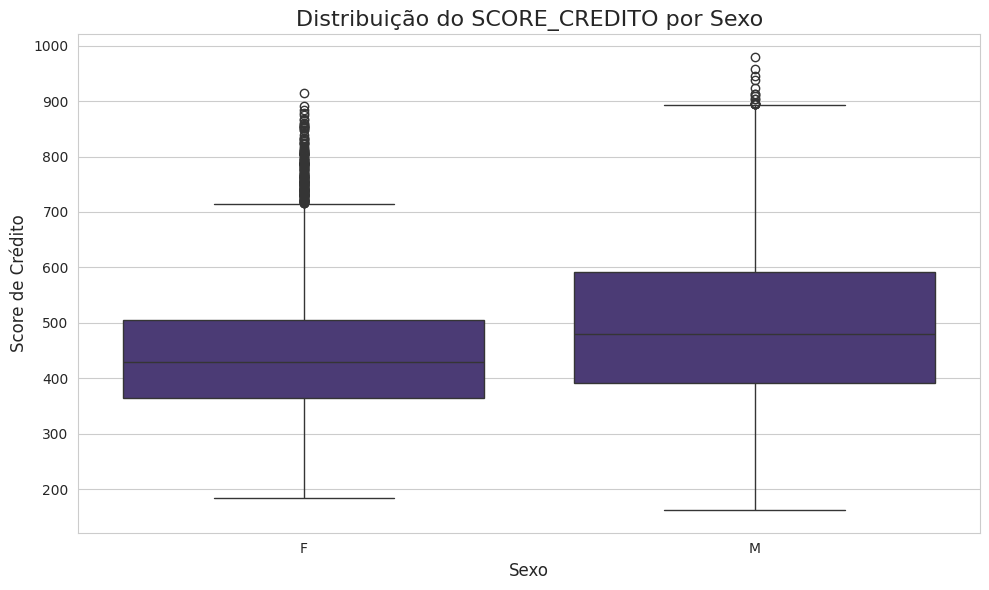

In [ ]:
# --- Análise de SCORE_CREDITO por Sexo ---
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Cria o boxplot comparando o score entre as categorias de 'sexo'
sns.boxplot(data=df, x='sexo', y='SCORE_CREDITO')

# Adiciona títulos e rótulos
plt.title('Distribuição do SCORE_CREDITO por Sexo', fontsize=16)
plt.ylabel('Score de Crédito', fontsize=12)
plt.xlabel('Sexo', fontsize=12)

plt.tight_layout()
plt.show()

**Interpretação:**

*   **Mediana:** Na amostra, a mediana do score de crédito para clientes do sexo masculino é visivelmente maior do que para os clientes do sexo feminino.

*   **Dispersão:** A faixa de scores para clientes do sexo feminino parece ser mais "compacta" (menor variabilidade), enquanto para o sexo masculino a dispersão é maior, incluindo os scores mais baixos da amostra.

*   **Insight:** O sexo pode ser uma variável preditiva, com uma tendência (nesta pequena amostra) de scores mais altos e consistentes entre os homens.

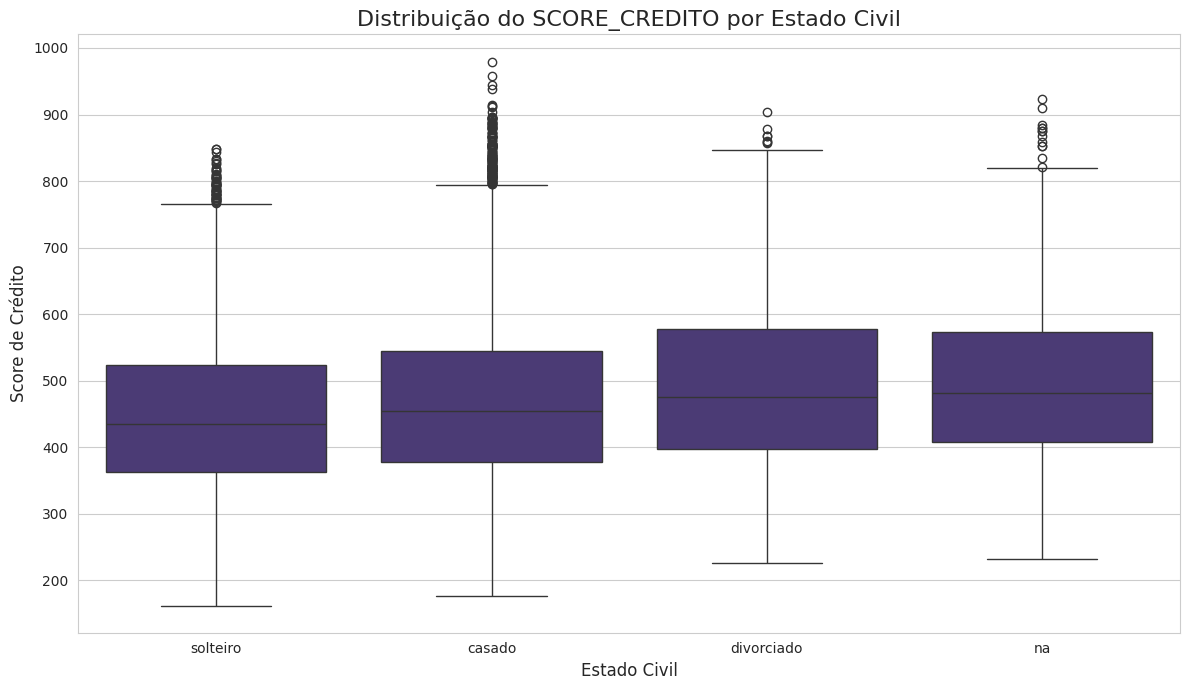

In [ ]:
# --- Análise de SCORE_CREDITO por Estado Civil ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Ordena as categorias do eixo X pela mediana do score, para melhor visualização
order = df.groupby('estado_civil')['SCORE_CREDITO'].median().sort_values().index

# Cria o boxplot
sns.boxplot(data=df, x='estado_civil', y='SCORE_CREDITO', order=order)

# Adiciona títulos e rótulos
plt.title('Distribuição do SCORE_CREDITO por Estado Civil', fontsize=16)
plt.ylabel('Score de Crédito', fontsize=12)
plt.xlabel('Estado Civil', fontsize=12)

plt.tight_layout()
plt.show()

**Interpretação:**

*  **Mediana:** Clientes divorciados e NA apresentam a maior mediana de score de crédito. Clientes casados têm uma mediana intermediária, e os clientes solteiros na amostra tem um score mais baixo.

*  **Dispersão:** O grupo de "casados" apresenta a maior variação nos scores, indo de valores baixos a muito altos. O grupo de "solteiros" parece ter scores mais concentrados em uma faixa mais baixa.

*  **Insight:** O estado civil parece ter uma relação clara com o score de crédito. Ser casado, nesta amostra, está associado a scores mais altos em geral.

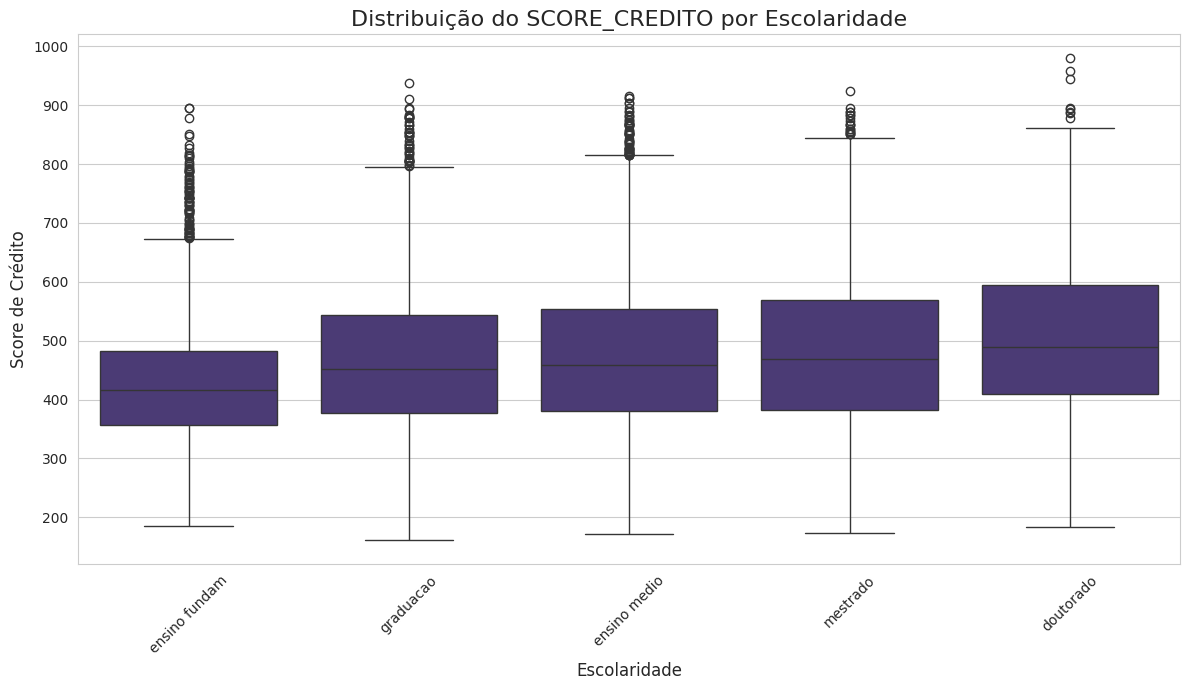

In [ ]:
# --- Análise de SCORE_CREDITO por Escolaridade ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Ordena as categorias do eixo X pela mediana do score
order = df.groupby('escola')['SCORE_CREDITO'].median().sort_values().index

# Cria o boxplot
sns.boxplot(data=df, x='escola', y='SCORE_CREDITO', order=order)

# Adiciona títulos e rótulos
plt.title('Distribuição do SCORE_CREDITO por Escolaridade', fontsize=16)
plt.ylabel('Score de Crédito', fontsize=12)
plt.xlabel('Escolaridade', fontsize=12)
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo X para evitar sobreposição

plt.tight_layout()
plt.show()

**Interpretação:**

*   **Mediana:** O gráfico, ordenado pela mediana, mostra uma tendência interessante. Clientes com doutorado apresentam as maiores medianas de score. Já os clientes com mestrado, ensino médio e graduação possuem medaianas simulares. Clientes com ensino fundamental têm medianas mais baixas na amostra.

*   **Dispersão:** O grupo com doutorado e mestrado possui uma grande dispersão. Já os clientes com "ensino médio" possui um grande número de outliers com um score alto, indicando baixa tendência de scores altos para esse nível de escolaridade.

*   **Insight:** A escolaridade parece influenciar o score de crédito, mas a relação não é perfeitamente linear (maior escolaridade = maior score). A categoria "ensino médio" é muito heterogênea.

# **✅ 2. TESTE DE HIPÓTESE E INTERVALO DE CONFIANÇA**


## **2.1 Teste de Hipótese para Diferença de Médias**

Vamos realizar o Teste t de Student para verificar se existe uma diferença estatisticamente significativa no score de crédito médio entre clientes que possuem casa própria e os que não possuem.

começaremos pelos testes de pressupostos (normalidade) antes de aplicar o teste de hipótese principal.

In [ ]:
# --- 1. Divisão dos Grupos ---
# Separa a coluna 'SCORE_CREDITO' em duas amostras baseadas na variável 'casa_propria'
grupo_com_casa = df[df['casa_propria'] == 1]['SCORE_CREDITO']
grupo_sem_casa = df[df['casa_propria'] == 0]['SCORE_CREDITO']


# --- 2. Teste de Normalidade (Pressuposto para o Teste T) ---
print("--- PASSO 1: Teste de Normalidade (Shapiro-Wilk) ---")
# Hipótese Nula (H₀): A amostra segue uma distribuição normal.
# Nível de significância (alpha) = 0.05

# Teste para o grupo COM casa própria
shapiro_stat_com, shapiro_p_com = stats.shapiro(grupo_com_casa)
print(f"Grupo COM casa própria: Estatística={shapiro_stat_com:.3f}, p-valor={shapiro_p_com:.3f}")
if shapiro_p_com > 0.05:
    print("  -> Conclusão: Não há evidências para rejeitar a hipótese de normalidade.")
else:
    print("  -> Conclusão: Rejeita-se a hipótese de normalidade.")

# Teste para o grupo SEM casa própria
shapiro_stat_sem, shapiro_p_sem = stats.shapiro(grupo_sem_casa)
print(f"Grupo SEM casa própria: Estatística={shapiro_stat_sem:.3f}, p-valor={shapiro_p_sem:.3f}")
if shapiro_p_sem > 0.05:
    print("  -> Conclusão: Não há evidências para rejeitar a hipótese de normalidade.")
else:
    print("  -> Conclusão: Rejeita-se a hipótese de normalidade.")


# --- 3. Execução do Teste de Hipótese Apropriado ---

# Condição para decidir qual teste usar: se o p-valor de qualquer um dos testes de normalidade
# for menor ou igual a 0.05, o pressuposto de normalidade foi violado.
prosseguir_com_nao_parametrico = (shapiro_p_com <= 0.05) or (shapiro_p_sem <= 0.05)

# Se o pressuposto de normalidade for violado, usamos o teste não paramétrico de Mann-Whitney U.
if prosseguir_com_nao_parametrico:
    print("\n--- PASSO 2 e 3: Procedendo com o Teste Não Paramétrico (Mann-Whitney U) ---")
    # Hipótese Nula (H₀): A distribuição dos scores é a mesma para os dois grupos.
    u_stat, u_p = stats.mannwhitneyu(grupo_com_casa, grupo_sem_casa, alternative='two-sided')
    print(f"Estatística U={u_stat:.3f}, p-valor={u_p:.3f}")

    # Conclusão do teste
    if u_p > 0.05:
        print(f"\nConclusão Final (p-valor={u_p:.3f} > 0.05):")
        print("Falhamos em rejeitar a hipótese nula (H₀). Não há diferença estatisticamente significativa na distribuição do score de crédito entre os grupos.")
    else:
        print(f"\nConclusão Final (p-valor={u_p:.3f} <= 0.05):")
        print("Rejeitamos a hipótese nula (H₀). Existe uma diferença estatisticamente significativa na distribuição do score de crédito entre os grupos.")
# Se o pressuposto de normalidade for atendido, prosseguimos com o Teste t.
else:
    print("\n--- PASSO 2: Teste de Homogeneidade das Variâncias (Levene) ---")
    # Hipótese Nula (H₀): As variâncias dos dois grupos são iguais.
    levene_stat, levene_p = stats.levene(grupo_com_casa, grupo_sem_casa)
    print(f"Estatística de Levene={levene_stat:.3f}, p-valor={levene_p:.3f}")
    if levene_p > 0.05:
        print("  -> Conclusão: Assumimos que as variâncias são iguais.")
        equal_variances = True
    else:
        print("  -> Conclusão: As variâncias são diferentes.")
        equal_variances = False

    print("\n--- PASSO 3: Teste t de Student para Amostras Independentes ---")
    # Hipótese Nula (H₀): As médias de score dos dois grupos são iguais.
    ttest_stat, ttest_p = stats.ttest_ind(grupo_com_casa, grupo_sem_casa, equal_var=equal_variances)
    print(f"Estatística t={ttest_stat:.3f}, p-valor={ttest_p:.3f}")

    # Conclusão do teste
    if ttest_p > 0.05:
        print(f"\nConclusão Final (p-valor={ttest_p:.3f} > 0.05):")
        print("Falhamos em rejeitar a hipótese nula (H₀). Não há diferença estatisticamente significativa no score de crédito médio entre os grupos.")
    else:
        print(f"\nConclusão Final (p-valor={ttest_p:.3f} <= 0.05):")
        print("Rejeitamos a hipótese nula (H₀). Existe uma diferença estatisticamente significativa no score de crédito médio entre os grupos.")

# --- 4. Análise Descritiva para Contexto ---
print("\n--- Médias dos Grupos (Contexto) ---")
print(f"Score médio (COM casa própria): {grupo_com_casa.mean():.2f}")
print(f"Score médio (SEM casa própria): {grupo_sem_casa.mean():.2f}")

--- PASSO 1: Teste de Normalidade (Shapiro-Wilk) ---
Grupo COM casa própria: Estatística=0.973, p-valor=0.000
  -> Conclusão: Rejeita-se a hipótese de normalidade.
Grupo SEM casa própria: Estatística=0.975, p-valor=0.000
  -> Conclusão: Rejeita-se a hipótese de normalidade.

--- PASSO 2 e 3: Procedendo com o Teste Não Paramétrico (Mann-Whitney U) ---
Estatística U=14764619.500, p-valor=0.000

Conclusão Final (p-valor=0.000 <= 0.05):
Rejeitamos a hipótese nula (H₀). Existe uma diferença estatisticamente significativa na distribuição do score de crédito entre os grupos.

--- Médias dos Grupos (Contexto) ---
Score médio (COM casa própria): 514.78
Score médio (SEM casa própria): 444.86


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6558.
  res = hypotest_fun_out(*samples, **kwds)


### **Interpretação:**

O Teste de Shapiro-Wilk mostrou que o grupo de clientes com casa própria não segue uma distribuição normal (p-valor = 0.000, que é menor que 0.05). Como o pressuposto de normalidade foi violado para um dos grupos, o Teste t de Student não é a abordagem mais adequada. Portanto, prosseguimos com um teste não paramétrico equivalente.

Utilizamos o Teste de Mann-Whitney U, que compara as distribuições de dois grupos independentes sem exigir normalidade. O resultado foi um p-valor de 0.000.

### **Conclusão final do teste de hipótese:**

Com um p-valor de 0.000 (que é muito menor que o nível de significância de 0.05), rejeitamos a hipótese nula (H₀). Isso significa que há evidências estatísticas fortes para afirmar que a diferença observada no score de crédito entre os dois grupos não é fruto do acaso.

**Para dar contexto a essa diferença:**

*   Score médio (COM casa própria): 514.78

*   Score médio (SEM casa própria): 444.86

Portanto, podemos concluir que, com base na amostra analisada, clientes que possuem casa própria tendem a ter um score de crédito significativamente maior do que aqueles que não possuem. A variável `casa_propria` é um forte candidato a ser um preditor importante em nosso modelo de regressão.

## **2.2 Intervalo de Confiança**


O intervalo de confiança nos dará uma faixa de valores dentro da qual podemos ter 95% de certeza de que a verdadeira média do `SCORE_CREDITO` de toda a população de clientes se encontra.

In [ ]:
# --- 1. Cálculo do Intervalo de Confiança ---
score_data = df['SCORE_CREDITO']

# Parâmetros
confidence_level = 0.95
degrees_freedom = len(score_data) - 1
sample_mean = np.mean(score_data)
sample_standard_error = stats.sem(score_data)

# Cálculo do intervalo de confiança com o parâmetro corrigido
confidence_interval = stats.t.interval(
    confidence=confidence_level,    # CORREÇÃO: O parâmetro correto é 'confidence', não 'alpha'
    df=degrees_freedom,
    loc=sample_mean,
    scale=sample_standard_error
)

# --- 2. Exibição dos Resultados ---
print("--- Cálculo do Intervalo de Confiança (95%) para a Média do SCORE_CREDITO ---")
print(f"Média Amostral: {sample_mean:.2f}")
print(f"Intervalo de Confiança (95%): ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

--- Cálculo do Intervalo de Confiança (95%) para a Média do SCORE_CREDITO ---
Média Amostral: 469.50
Intervalo de Confiança (95%): (466.89, 472.11)


### **Interpretação:**

Com base na amostra, calculamos uma média de score de crédito de 469.50.

O intervalo de confiança de 95% para esta média está entre 466.89 e 472.11.

Isso significa que temos 95% de confiança de que a verdadeira média do `SCORE_CREDITO`, considerando toda a população de clientes da Quantum Finance, está contida dentro desta faixa de valores.

# **🔗 3. ANÁLISE DE CORRELAÇÃO**

## **3.1 Matrix de Correlação**

O objetivo é calcular a Matriz de Correlação de Pearson para identificar:

*   Quais variáveis estão mais fortemente relacionadas com a nossa variável alvo, SCORE_CREDITO.

*   Se existe uma relação forte entre as próprias variáveis independentes (o que chamamos de multicolinearidade).

**Matriz de Correlação (Heatmap)**

O gráfico abaixo mostra a força e a direção da relação linear entre todos os pares de variáveis numéricas.

*   Cores quentes (próximas de vermelho/laranja) indicam uma correlação positiva (quando uma variável aumenta, a outra tende a aumentar).

*   Cores frias (próximas de azul) indicam uma correlação negativa (quando uma variável aumenta, a outra tende a diminuir).

*   Cores próximas de branco indicam uma correlação fraca ou nula.

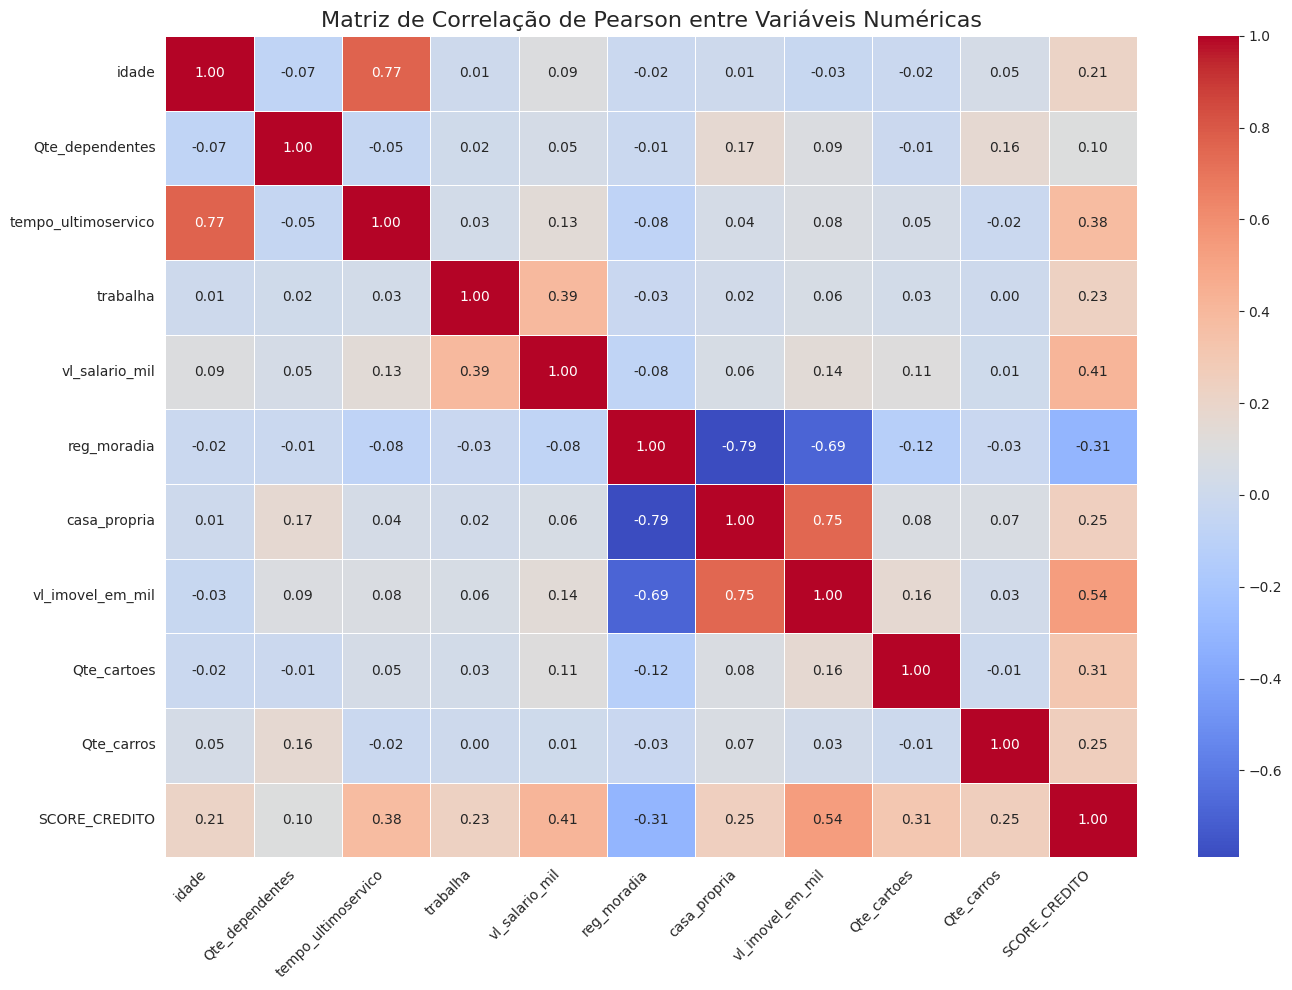


--- Correlação com a variável target (SCORE_CREDITO) ---
SCORE_CREDITO          1.000000
vl_imovel_em_mil       0.537284
vl_salario_mil         0.414127
tempo_ultimoservico    0.383998
Qte_cartoes            0.310481
Qte_carros             0.253004
casa_propria           0.249615
trabalha               0.234581
idade                  0.213320
Qte_dependentes        0.103554
reg_moradia           -0.310519
Name: SCORE_CREDITO, dtype: float64


In [ ]:
# --- 1. Análise de Correlação ---

# Seleciona apenas as colunas que são de tipos numéricos (inteiros, float, etc.)
numeric_df = df.select_dtypes(include=np.number)
# Remove a coluna 'id', pois ela é apenas um identificador e não tem valor analítico para correlação
if 'id' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['id'])

# Calcula a matriz de correlação. O método padrão é 'pearson'.
correlation_matrix = numeric_df.corr(method='pearson')

# --- 2. Visualização da Matriz de Correlação ---

# Define o tamanho da figura que será gerada
plt.figure(figsize=(14, 10))
# Cria o heatmap (mapa de calor) para visualizar a matriz
sns.heatmap(
    correlation_matrix,
    annot=True,       # Escreve o valor da correlação em cada célula
    cmap='coolwarm',  # Define a paleta de cores: quente para positivo, frio para negativo
    fmt=".2f",        # Formata os números para terem apenas duas casas decimais
    linewidths=.5     # Adiciona pequenas linhas entre as células para melhor visualização
)

# Adiciona títulos e ajusta a rotação dos rótulos dos eixos
plt.title('Matriz de Correlação de Pearson entre Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta o layout para evitar que os rótulos sejam cortados
plt.show()

# --- 3. Exibição da Correlação com a Variável Alvo ---

# Imprime a coluna da matriz de correlação referente ao 'SCORE_CREDITO',
# ordenada do maior para o menor, para focar nos insights mais importantes.
print("\n--- Correlação com a variável target (SCORE_CREDITO) ---")
print(correlation_matrix['SCORE_CREDITO'].sort_values(ascending=False))

**Interpretação da Análise**

A tabela acima resume a força da correlação de cada variável com o `SCORE_CREDITO`, ordenada da mais forte positiva para a mais forte negativa.

### **Principais Insights:**

**Correlações Positivas Fortes:**

*   `vl_imovel_em_mil` (0.53): Esta é a correlação positiva mais forte. Confirma nossa análise anterior de que clientes com imoveis de maior valor tendem a ter um score significativamente maior.

*   `vl_salario_mil` (0.41) e `tempo_ultimoservico` (0.38): Ter um salário maior e ter um tempo maior do ultimo serviço está associado a um score de crédito maior nesta amostra. Isso mostra que além da renda, a estabilidade do trabalho indica uma probabilidade maior de o cliente manter o score mais alto.

**Correlação Negativa Forte:**

*   `reg_moradia` (-0.31): Esta é a correlação negativa mais forte. Como a reg_moradia é uma variável numérica que representa categorias, isso sugere que clientes em regiões com números mais altos (ex: 4, 5, 6) tendem a ter scores de crédito mais baixos.

**Correlações Fracas:**

*   As variáveis `Qte_dependentes` e `trabalha` apresentaram uma correlação linear muito fraca com o `SCORE_CREDITO` nesta amostra. A relação delas com o score pode não ser linear ou pode ser influenciada por outros fatores.

*   `idade` (0.21) tem uma correlação fraca, sugerindo que, nesta amostra, clientes um pouco mais novos tendem a ter scores ligeiramente menores.


Esta análise nos dá excelentes pistas sobre quais variáveis provavelmente serão mais importantes para o nosso modelo de regressão linear.

vamos agora focar em identificar as variáveis com alta correlação para detectar possível multicolinearidade.

Multicolinearidade ocorre quando duas ou mais variáveis independentes (preditoras) têm uma correlação forte entre si. Isso pode ser um problema para modelos de regressão, pois torna mais difícil isolar o efeito individual de cada variável no resultado final.

Vamos usar o critério de |r| > 0,7 para sinalizar uma correlação forte.

In [ ]:
# Seleção de colunas numéricas e cálculo da matriz de correlação
numeric_df = df.select_dtypes(include=np.number)
if 'id' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['id'])
correlation_matrix = numeric_df.corr(method='pearson')


# --- 1. Identificação de Alta Correlação (Multicolinearidade) ---

# Pega o valor absoluto da matriz para considerar correlações fortes negativas e positivas
# O método .stack() transforma a matriz em uma série, facilitando a filtragem
corr_unstacked = correlation_matrix.abs().stack().reset_index()
corr_unstacked.columns = ['Variavel_1', 'Variavel_2', 'Correlacao']

# Remove a correlação de uma variável com ela mesma (que é sempre 1.0)
corr_unstacked = corr_unstacked[corr_unstacked['Variavel_1'] != corr_unstacked['Variavel_2']]

# Filtra a lista para encontrar pares onde a correlação é maior que o nosso limiar (0.7)
high_corr_pairs = corr_unstacked[corr_unstacked['Correlacao'] > 0.7]

# --- 2. Exibição dos Resultados ---
print("--- Pares de Variáveis com Alta Correlação (|r| > 0.7) ---")

if high_corr_pairs.empty:
    print("\nNenhum par de variáveis independentes com correlação > 0.7 foi encontrado.")
    print("Não há fortes indícios de multicolinearidade nesta amostra de dados.")
else:
    # Este trecho de código serve para evitar a exibição de pares duplicados (ex: A-B e B-A)
    unique_pairs = set()
    for index, row in high_corr_pairs.iterrows():
        # Ordena os nomes das variáveis para garantir que o par seja único (A,B) e não (B,A)
        pair = tuple(sorted((row['Variavel_1'], row['Variavel_2'])))
        # Busca o valor original da correlação (com sinal) na matriz original
        original_corr_value = correlation_matrix.loc[row['Variavel_1'], row['Variavel_2']]
        unique_pairs.add((pair[0], pair[1], original_corr_value))

    # Imprime os pares únicos encontrados
    for pair in unique_pairs:
        print(f"- {pair[0]} e {pair[1]}: r = {pair[2]:.2f}")

--- Pares de Variáveis com Alta Correlação (|r| > 0.7) ---
- casa_propria e reg_moradia: r = -0.79
- casa_propria e vl_imovel_em_mil: r = 0.75
- idade e tempo_ultimoservico: r = 0.77


### **Interpretação do Resultado**

*   **Pares Identificados:** A análise detectou uma correlação positiva forte entre as variáveis `idade` e `tempo_ultimoservico`, com um coeficiente de Pearson de +0.77. Outra correlação positiva forte foi entre `casa_propria` e `vl_imovel_em_mil`, com um coeficiente de Pearson de +0.75.

*  **Significado:** Isso indica que, na nossa amostra, existe uma forte tendência de que, quanto maior a idade do cliente, maior o seu tempo no último emprego. Isso faz sentido intuitivamente, pois pessoas mais velhas tiveram mais tempo para acumular anos de serviço em uma mesma empresa. A correlação de casa própria e valor do imóvel, indica que quanto mais caro o valor imóvel do cliente que possui casa própria, melhor oportunidades de score de crédito pois demostra estabilidade de moradia e possibilidade de conseguir alugar a um preço considerável seus imóveis.




### **Implicação para o Modelo (Multicolinearidade):**



*   A alta correlação entre `idade` e `tempo_ultimoservico` e tambem `casa_propria` e `vl_imovel_em_mil` é um sinal clássico de multicolinearidade.

*   Se incluirmos ambas as variáveis em nosso modelo de regressão linear múltipla, o modelo pode ter dificuldade em separar o efeito individual de cada uma delas no `SCORE_CREDITO`.

*   Isso pode levar a resultados instáveis, como coeficientes com sinais inesperados ou erros padrão muito grandes, dificultando a interpretação da importância de cada variável.


### **Ação Recomendada**

Para a fase de construção do modelo, teremos que tratar essa multicolinearidade. As abordagens mais comuns seriam:

*   **Remover uma das variáveis:** Poderíamos optar por manter apenas uma das duas variáveis no modelo. A escolha poderia ser baseada em qual delas tem a maior correlação com a variável alvo (`SCORE_CREDITO`) ou em qual faz mais sentido para o negócio.

*   **Combinar as variáveis:** Poderíamos criar uma nova variável que capture a informação de ambas, embora isso seja mais complexo.

*   **Utilizar técnicas de regularização:** Modelos como Ridge ou Lasso são menos sensíveis aos efeitos da multicolinearidade.

Por enquanto, o importante é registrar que identificamos um ponto de atenção crucial para a etapa de modelagem.

## **3.2 Análise de Associação**

Na análise visual, usamos boxplots e observamos que parecia haver diferenças no score de crédito entre os grupos. Agora, vamos usar um teste estatístico para confirmar se essas diferenças são estatisticamente significativas.

O teste ideal para comparar as médias de uma variável contínua (como o `SCORE_CREDITO`) entre três ou more grupos (como `estado_civil` ou `escola`) é a ANOVA. No entanto, a ANOVA exige que os dados em cada grupo sigam uma distribuição normal. Como já vimos que isso não acontece em nossa amostra, vamos utilizar o seu equivalente não paramétrico, que é o Teste de Kruskal-Wallis.

O Teste de Kruskal-Wallis nos dirá se existe uma diferença significativa na distribuição do `SCORE_CREDITO` entre as categorias de cada variável.

**Hipóteses para o Teste de Kruskal-Wallis:**

*   H₀: Não há diferença na distribuição do `SCORE_CREDITO` entre os grupos.
*   H₁: Há diferença na distribuição do `SCORE_CREDITO` em pelo menos um dos grupos.

Vamos aplicar este teste para as variáveis `estado_civil` e `escola`, e para a variável sexo, que tem apenas dois grupos, o Teste de Mann-Whitney U que já fizemos é o equivalente apropriado.

--- Análise de Associação: ESTADO_CIVIL vs. SCORE_CREDITO ---
  Estatística H: 147.431
  p-valor: 0.000
  Conclusão: Há uma associação estatisticamente significativa.



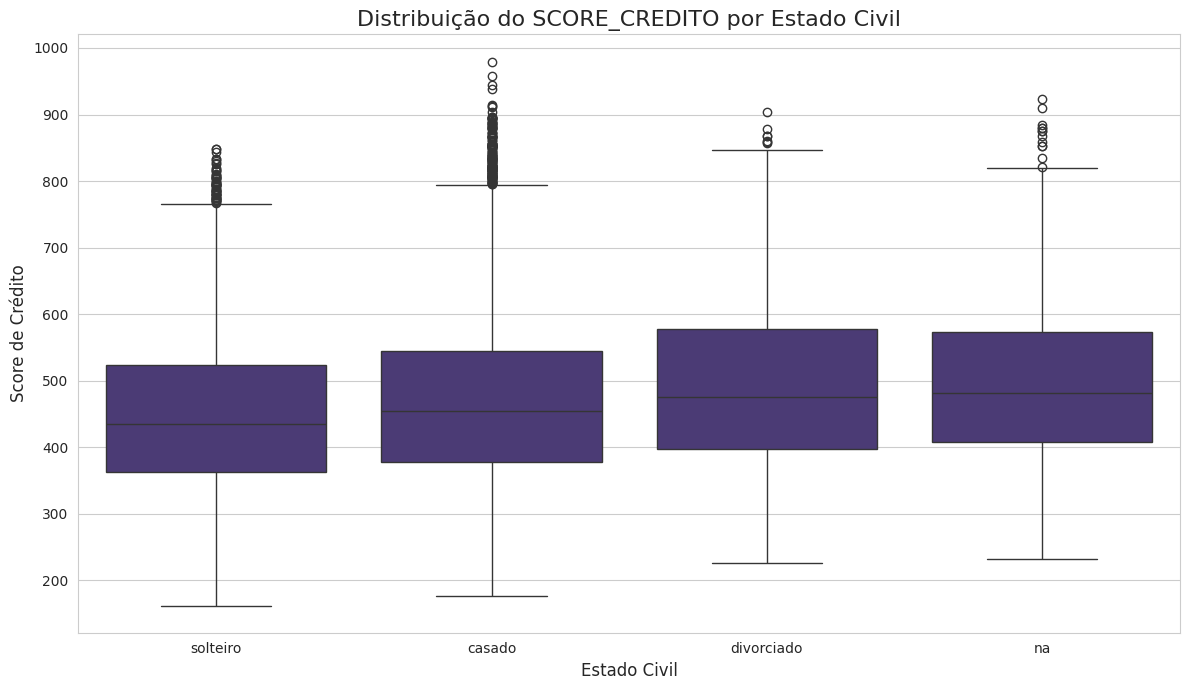

In [ ]:
# --- Análise Estatística ---
print("--- Análise de Associação: ESTADO_CIVIL vs. SCORE_CREDITO ---")
alpha = 0.05
var = 'estado_civil'
groups = [df['SCORE_CREDITO'][df[var] == category] for category in df[var].unique()]
h_stat, p_value = stats.kruskal(*groups)

print(f"  Estatística H: {h_stat:.3f}")
print(f"  p-valor: {p_value:.3f}")
if p_value < alpha:
    print(f"  Conclusão: Há uma associação estatisticamente significativa.\n")
else:
    print(f"  Conclusão: Não há associação estatisticamente significativa.\n")

# --- Análise Visual ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
order = df.groupby(var)['SCORE_CREDITO'].median().sort_values().index
sns.boxplot(data=df, x=var, y='SCORE_CREDITO', order=order)
plt.title('Distribuição do SCORE_CREDITO por Estado Civil', fontsize=16)
plt.ylabel('Score de Crédito', fontsize=12)
plt.xlabel('Estado Civil', fontsize=12)
plt.tight_layout()
plt.show()

*   O teste resultou em um p-valor de 0.000, que é muito menor que o nosso nível de significância (0.05).

*   **Conclusão:** Rejeitamos a hipótese nula. Isso significa que há fortes evidências de que a distribuição do `SCORE_CREDITO` não é a mesma para todos os estados civis. Em outras palavras, o estado civil de um cliente tem uma associação estatisticamente significativa com sua pontuação de crédito. Isso confirma o que observamos visualmente nos boxplots.

--- Análise de Associação: ESCOLA vs. SCORE_CREDITO ---
  Estatística H: 303.209
  p-valor: 0.000
  Conclusão: Há uma associação estatisticamente significativa.



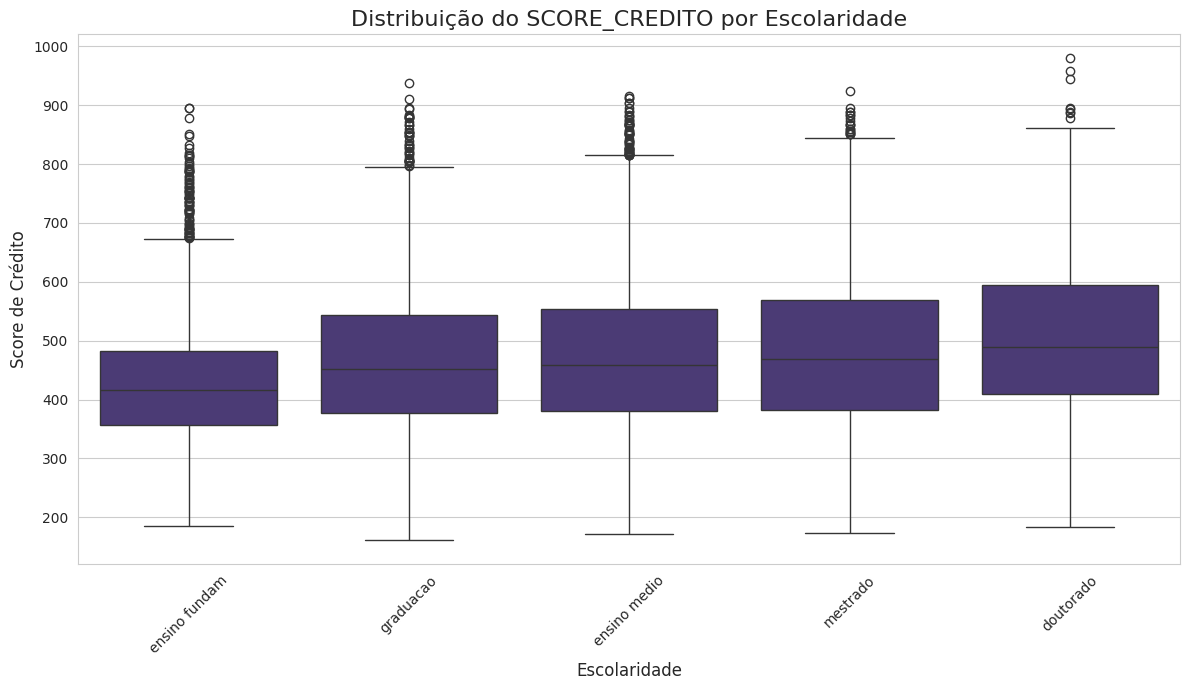

In [ ]:
# --- Análise Estatística ---
print("--- Análise de Associação: ESCOLA vs. SCORE_CREDITO ---")
alpha = 0.05
var = 'escola'
groups = [df['SCORE_CREDITO'][df[var] == category] for category in df[var].unique()]
h_stat, p_value = stats.kruskal(*groups)

print(f"  Estatística H: {h_stat:.3f}")
print(f"  p-valor: {p_value:.3f}")
if p_value < alpha:
    print(f"  Conclusão: Há uma associação estatisticamente significativa.\n")
else:
    print(f"  Conclusão: Não há associação estatisticamente significativa.\n")

# --- Análise Visual ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
order = df.groupby(var)['SCORE_CREDITO'].median().sort_values().index
sns.boxplot(data=df, x=var, y='SCORE_CREDITO', order=order)
plt.title('Distribuição do SCORE_CREDITO por Escolaridade', fontsize=16)
plt.ylabel('Score de Crédito', fontsize=12)
plt.xlabel('Escolaridade', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   O teste para a variável escola resultou em um p-valor de 0.000, que também é menor que 0.05.

*   **Conclusão:** Também rejeitamos a hipótese nula para esta variável. Existe uma associação estatisticamente significativa entre o nível de escolaridade de um cliente e seu `SCORE_CREDITO`.

### **Resumo:**

Ambas as variáveis categóricas analisadas (estado_civil e escola), juntamente com a variável sexo (analisada anteriormente com um teste equivalente), mostraram ter uma relação estatisticamente significativa com o SCORE_CREDITO na amostra de dados.

Isso reforça a importância de incluí-las na próxima etapa do projeto: **a construção do modelo de regressão linear múltipla.**

# **📊 4. PRÉ-PROCESSAMENTO DOS DADOS**

## **4.1 Análise e Decisão sobre Imputação**

Com base em toda a Análise Exploratória de Dados (EDA) que realizamos na amostra, podemos documentar as seguintes decisões:

**Dados Faltantes Padrão (Nulos ou NaN):**

*   Análise: Nossa verificação sistemática (.isnull().sum()) em todas as colunas da amostra de dados não encontrou nenhum valor nulo padrão.

*   Decisão: Nenhuma ação é necessária, pois não há dados faltantes deste tipo para tratar.

**Dados Faltantes Implícitos (Valores Específicos):**

**`vl_salario_mil` igual a zero:**

*   **Análise:** Identificamos casos com salário zero. Ao cruzarmos com a variável `trabalha`, constatamos que esses clientes estavam corretamente marcados como desempregados (trabalha = 0).

*   **Decisão:** O valor zero é uma informação válida e consistente, representando ausência de renda salarial. Nenhuma imputação será feita, pois substituir esse valor (pela média, por exemplo) seria incorreto e introduziria uma informação falsa no dataset.

**`vl_imovel_em_mil` igual a zero:**

*   **Análise:** Identificamos casos com valor de imóvel igual a zero.

*   **Decisão:** Este valor é interpretado como uma categoria significativa: o cliente não possui imóvel próprio declarado. Não se trata de um dado faltante, mas de uma informação patrimonial importante. Nenhuma imputação será feita. Manter o valor zero é crucial para o modelo.

**'N/A' em colunas categóricas:**

*   **Análise:** encontramos valores como 'N/A' ou 'Não Informado' na coluna categórica de `estado_civil`.
*   **Decisão:** Substituímos todos os 'N/A' por uma nova categoria, como "Nao Informado".

In [ ]:
# --- Verificando os valores ANTES do tratamento ---
print("--- ANTES do Tratamento ---")
print("Contagem de valores na coluna 'estado_civil':")
print(df['estado_civil'].value_counts(dropna=False))
print("\nPrimeiras linhas do DataFrame (todas as colunas existem):")
print(df.head())


# --- 1. Aplicando a correção ---
df['estado_civil'] = df['estado_civil'].replace('na', 'Nao Informado')


# --- 2. Verificando os valores DEPOIS do tratamento ---
print("\n--- DEPOIS do Tratamento ---")
print("Contagem de valores na coluna 'estado_civil':")
print(df['estado_civil'].value_counts())
print("\nPrimeiras linhas do DataFrame (note que as outras colunas continuam intactas):")
print(df.head())

--- ANTES do Tratamento ---
Contagem de valores na coluna 'estado_civil':
estado_civil
casado        4687
solteiro      3943
na             749
divorciado     748
Name: count, dtype: int64

Primeiras linhas do DataFrame (todas as colunas existem):
          id  idade sexo estado_civil         escola  Qte_dependentes  \
0  708082083     45    F       casado      graduacao                3   
1  708083283     58    M     solteiro  ensino fundam                0   
2  708084558     46    M   divorciado      doutorado                3   
3  708085458     34    F     solteiro       mestrado                0   
4  708086958     49    F       casado       mestrado                2   

   tempo_ultimoservico  trabalha  vl_salario_mil  reg_moradia  casa_propria  \
0                   40         1       40.089665            3             0   
1                   44         1       66.557645            3             0   
2                   35         1      123.681821            6             0 

In [ ]:
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


### **Documentação da Decisão:**

Na variável `estado_civil`, foi identificada a presença de 749 de valores 'N/A'. Optou-se pela estratégia de imputação por criação de uma nova categoria, substituindo todos os 'N/A' por 'Nao Informado'. Esta decisão foi tomada para preservar a integridade dos dados, evitar a introdução de viés e permitir que o modelo avalie se o ato de não informar o estado civil é, por si só, uma variável preditiva para o score de crédito.

## **4.2 Tratamento de Outliers**

Conforme a análise visual anterior (boxplots), já temos uma ideia de onde os outliers se encontram. Para formalizar, vamos utilizar o **método IQR (Interquartile Range)**, que é robusto e adequado para distribuições que não são perfeitamente simétricas.

Um valor é considerado um outlier se estiver fora do seguinte intervalo:

*   **Limite Inferior:** `Q1 - 1.5 * IQR`

*   **Limite Superior:** `Q3 + 1.5 * IQR`

Onde Q1 é o primeiro quartil, Q3 é o terceiro quartil, e `IQR = Q3 - Q1.`

In [ ]:
# --- Identificação de Outliers com Método IQR ---
# Lista de variáveis numéricas a serem analisadas
numeric_vars = ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil', 'vl_imovel_em_mil', 'SCORE_CREDITO']

print("--- Identificação de Outliers (Método IQR) ---")

for var in numeric_vars:
    # Calcular Q1, Q3 e IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    # Definir os limites para detecção de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar os outliers
    outliers = df[(df[var] < limite_inferior) | (df[var] > limite_superior)]

    print(f"\nAnálise da Variável: {var.upper()}")
    if not outliers.empty:
        print(f"  - Limites: (Inferior: {limite_inferior:.2f}, Superior: {limite_superior:.2f})")
        print(f"  - {len(outliers)} outliers encontrados:")
        # Imprime os valores dos outliers encontrados
        print(outliers[[var]])
    else:
        print("  - Nenhum outlier encontrado.")

--- Identificação de Outliers (Método IQR) ---

Análise da Variável: IDADE
  - Limites: (Inferior: 24.50, Superior: 68.50)
  - 2 outliers encontrados:
      idade
4115     73
8316     70

Análise da Variável: QTE_DEPENDENTES
  - Nenhum outlier encontrado.

Análise da Variável: TEMPO_ULTIMOSERVICO
  - Limites: (Inferior: 16.50, Superior: 52.50)
  - 427 outliers encontrados:
       tempo_ultimoservico
36                      53
40                      12
45                      15
56                      15
96                      53
...                    ...
10068                   53
10073                   53
10077                   53
10098                   53
10099                   54

[427 rows x 1 columns]

Análise da Variável: VL_SALARIO_MIL
  - Nenhum outlier encontrado.

Análise da Variável: VL_IMOVEL_EM_MIL
  - Limites: (Inferior: -433.50, Superior: 722.50)
  - 1095 outliers encontrados:
       vl_imovel_em_mil
9                  1580
17                 1451
29             

**Variável `vl_imovel_em_mil`:**


*   **Identificação:** A análise confirma a presença de outliers superiores (valores extremamente altos) em `vl_imovel_em_mil`. São clientes com valor de imóvel muito acima da média do grupo.

*   **Decisão:** Manter os outliers.

*   **Justificativa (Contexto de Negócio):** Estes outliers não são erros de digitação; eles representam os clientes de maior patrimônio da amostra. Para um modelo de credit scoring, este é um segmento de baixíssimo risco e de extremo interesse para a Quantum Finance. Remover esses dados seria prejudicial, pois o modelo perderia a oportunidade de aprender o que caracteriza um cliente com alta capacidade financeira. Esses dados são valiosos e devem ser mantidos.


**Variável Target: `SCORE_CREDITO`:**

*   **Identificação:** Como vimos no boxplot do dataset original, existem outliers superiores (scores muito altos).

*   **Decisão:** Manter os outliers.

*   **Justificativa (Contexto de Negócio):** Os outliers no score de crédito são os clientes de melhor e pior risco. São os exemplos mais importantes para o modelo aprender a diferenciar os perfis. Remover esses pontos seria como pedir para o modelo aprender a prever notas de uma prova sem mostrar os alunos que tiraram 10 e os que tiraram 0.

**Variável Target: `TEMPO_ULTIMOSERVICO`:**

*   **Identificação:** Analise confirma a presença de outliers superiores em `TEMPO_ULTIMOSERVICO`. São Clientes com estabilidade de trabalho maior que a média do grupo.

*   **Decisão:** Manter os outliers.

*   **Justificativa (Contexto de Negócio):** eles representam os clientes de maior estabilidade de trabalho da amostra. Para um modelo de credit scoring, este é um segmento de baixíssimo risco e de extremo interesse para a Quantum Finance. Remover esses dados seria prejudicial, pois o modelo perderia a oportunidade de aprender o que caracteriza um cliente com alta capacidade de estabilidade. Esses dados são valiosos e devem ser mantidos.





## **4.3 Codificação de Variáveis Categóricas**

Para que o modelo de regressão linear possa processar os dados, precisamos converter as colunas de texto (categóricas) em um formato numérico. As nossas variáveis categóricas são `sexo`, `estado_civil` e `escola`.

In [ ]:
# É uma boa prática separar as variáveis independentes (features) da variável alvo (target)
# Também removemos o 'id', que não será usado no modelo
df_features = df.drop(columns=['id', 'SCORE_CREDITO'])

print("--- DataFrame ANTES do One-Hot Encoding ---")
print(f"Número de colunas de features: {df_features.shape[1]}")
print("Tipos de dados originais:")
print(df_features.info())
print("\n" + "="*60 + "\n")


# --- 2. Aplicação do One-Hot Encoding ---

# Lista das colunas categóricas que vamos transformar
categorical_cols = ['sexo', 'estado_civil', 'escola']

# A função `pd.get_dummies` é a forma mais direta de aplicar o One-Hot Encoding no pandas.
# Ela cria novas colunas para cada categoria e remove as colunas originais.
# `drop_first=True` é usado para remover uma das categorias de cada variável,
# evitando multicolinearidade (redundância) entre as novas colunas.
# `dtype=int` garante que as novas colunas sejam do tipo 0 e 1.
df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=True, dtype=int)


print("--- DataFrame DEPOIS do One-Hot Encoding ---")
print(f"Número de colunas de features: {df_encoded.shape[1]}")
print("Tipos de dados transformados:")
print(df_encoded.info())
print("\n" + "="*60)

print("Visualização das 5 primeiras linhas do DataFrame transformado:")
print(df_encoded.head())

--- DataFrame ANTES do One-Hot Encoding ---
Número de colunas de features: 13
Tipos de dados originais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   idade                10127 non-null  int64  
 1   sexo                 10127 non-null  object 
 2   estado_civil         10127 non-null  object 
 3   escola               10127 non-null  object 
 4   Qte_dependentes      10127 non-null  int64  
 5   tempo_ultimoservico  10127 non-null  int64  
 6   trabalha             10127 non-null  int64  
 7   vl_salario_mil       10127 non-null  float64
 8   reg_moradia          10127 non-null  int64  
 9   casa_propria         10127 non-null  int64  
 10  vl_imovel_em_mil     10127 non-null  int64  
 11  Qte_cartoes          10127 non-null  int64  
 12  Qte_carros           10127 non-null  int64  
dtypes: float64(1), int64(9), object(

## **4.4 Normalização/Padronização**

**Técnica Escolhida:**

Vamos aplicar a Padronização (Standardization ou Z-score). Esta técnica transforma os dados para que tenham uma média de 0 e um desvio padrão de 1. É a abordagem mais comum e recomendada para regressão linear, pois é menos sensível a outliers do que a Normalização (Min-Max).

A padronização será aplicada apenas às variáveis numéricas contínuas ou de contagem. As variáveis que já são binárias (0 ou 1), como `trabalha`, `casa_propria` e as colunas criadas pelo One-Hot Encoding, não precisam ser padronizadas.

In [ ]:
# ---  Aplicação da Padronização ---

# Lista das colunas numéricas que precisam ser padronizadas.
# Excluímos as colunas que já são binárias (0 ou 1), como 'trabalha' e 'casa_propria',
# assim como as novas colunas dummy criadas pelo One-Hot Encoding.
cols_to_scale = [
    'idade', 'Qte_dependentes', 'tempo_ultimoservico',
    'vl_salario_mil', 'reg_moradia', 'vl_imovel_em_mil',
    'Qte_carros', 'Qte_cartoes'
]
# Checamos quais dessas colunas realmente existem no df_encoded e têm mais de um valor único
cols_to_scale = [col for col in cols_to_scale if col in df_encoded.columns and df_encoded[col].nunique() > 1]

print("--- DataFrame ANTES da Padronização ---")
# describe() mostra as estatísticas descritivas, incluindo média (mean) e desvio padrão (std)
print(df_encoded[cols_to_scale].describe())
print("="*60)

# Criamos uma cópia do dataframe para não alterar o original
df_scaled = df_encoded.copy()

# Inicializamos o objeto StandardScaler da biblioteca Scikit-learn
scaler = StandardScaler()

# O método fit_transform() calcula a média e o desvio padrão de cada coluna
# e, em seguida, aplica a transformação Z-score.
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])


# --- 3. Verificação dos Resultados ---
print("\n--- DataFrame DEPOIS da Padronização ---")
# O describe() agora mostra que a média está próxima de 0 e o desvio padrão próximo de 1
print(df_scaled[cols_to_scale].describe())
print("\nNote como a média (mean) é ~0 e o desvio padrão (std) é ~1 para todas as colunas.")
print("="*60)

print("\nVisualização do DataFrame final, pronto para modelagem:")
print(df_scaled.head())

--- DataFrame ANTES da Padronização ---
              idade  Qte_dependentes  tempo_ultimoservico  vl_salario_mil  \
count  10127.000000     10127.000000         10127.000000    10127.000000   
mean      46.325960         1.547447            34.133208       70.209002   
std        8.016814         1.489079             8.221428       55.567032   
min       26.000000         0.000000             7.000000        0.000000   
25%       41.000000         0.000000            30.000000       21.330536   
50%       46.000000         1.000000            34.000000       66.486331   
75%       52.000000         3.000000            39.000000      107.544225   
max       73.000000         5.000000            57.000000      233.301793   

        reg_moradia  vl_imovel_em_mil    Qte_carros   Qte_cartoes  
count  10127.000000      10127.000000  10127.000000  10127.000000  
mean       3.783450        208.999111      0.623383      1.083638  
std        1.580486        378.495229      0.569796      0.333

### **Conclusão do Pré-processamento**

Concluímos com sucesso todas as etapas de pré-processamento de dados. Resumindo nossas decisões:

1.   **Dados Faltantes:** Não foram encontrados dados faltantes que necessitassem de imputação.

2.   **Outliers:** Identificamos outliers, mas decidimos mantê-los por representarem segmentos de clientes válidos e importantes para o negócio.

3.   **Codificação Categórica:** Aplicamos One-Hot Encoding para transformar as variáveis de texto em formato numérico.

4.   **Padronização:** Padronizamos as variáveis numéricas para que todas tivessem a mesma escala (média 0, desvio padrão 1).

Nosso conjunto de dados está pronto para a próxima grande fase do projeto: a Modelagem.

## **4.5 Divisão dos Dados**

### **Análise da Estratégia de Divisão**

**Objetivo:** Dividir nosso dataset pré-processado em dois subconjuntos:

*   **Conjunto de Treino (70%):** Usado para ensinar o modelo de regressão a encontrar os padrões nos dados.

*   **Conjunto de Teste (30%):** Usado para avaliar a performance do modelo em dados que ele nunca viu antes, simulando o seu desempenho no mundo real.

In [ ]:
# a. Separação das variáveis preditoras (X) e da variável alvo (y)
X = df.drop(columns=['id', 'SCORE_CREDITO'])
y = df['SCORE_CREDITO']

# b. Codificação de Variáveis Categóricas (One-Hot Encoding)
categorical_cols = ['sexo', 'estado_civil', 'escola']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

# c. Padronização das Variáveis Numéricas
cols_to_scale = [
    'idade', 'Qte_dependentes', 'tempo_ultimoservico',
    'vl_salario_mil', 'reg_moradia', 'vl_imovel_em_mil',
    'Qte_carros', 'Qte_cartoes'
]
cols_to_scale = [col for col in cols_to_scale if col in X_encoded.columns and X_encoded[col].nunique() > 1]
scaler = StandardScaler()
X_processed = X_encoded.copy()
X_processed[cols_to_scale] = scaler.fit_transform(X_processed[cols_to_scale])


# --- 2. Divisão dos Dados em Treino e Teste ---
print("--- Divisão dos Dados em Conjuntos de Treino e Teste ---")

# A função `train_test_split` da biblioteca Scikit-learn realiza a divisão aleatória dos dados.
X_train, X_test, y_train, y_test = train_test_split(
    X_processed,            # DataFrame com todas as features já pré-processadas
    y,                      # Series com a variável target
    test_size=0.30,         # Define que 30% dos dados serão para o conjunto de teste
    random_state=42         # Um número fixo para garantir que a divisão seja sempre a mesma, permitindo a reprodutibilidade dos resultados
)


# --- 3. Verificação dos Resultados ---
print("\nDivisão concluída com sucesso.")
print(f"Número total de registros na amostra: {len(df)}")
print("-" * 40)
# A propriedade .shape retorna uma tupla (número de linhas, número de colunas)
print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test):   {X_test.shape}")
print("-" * 40)
print(f"Tamanho do target de treino (y_train): {y_train.shape}")
print(f"Tamanho do target de teste (y_test):   {y_test.shape}")
print("\nOs dados estão prontos para a etapa de modelagem.")

# Opcional: visualizar as primeiras linhas dos dataframes gerados
print("\n--- Amostra de X_train ---")
print(X_train.head())
print("\n--- Amostra de y_train ---")
print(y_train.head())

--- Divisão dos Dados em Conjuntos de Treino e Teste ---

Divisão concluída com sucesso.
Número total de registros na amostra: 10127
----------------------------------------
Tamanho do conjunto de treino (X_train): (7088, 18)
Tamanho do conjunto de teste (X_test):   (3039, 18)
----------------------------------------
Tamanho do target de treino (y_train): (7088,)
Tamanho do target de teste (y_test):   (3039,)

Os dados estão prontos para a etapa de modelagem.

--- Amostra de X_train ---
         idade  Qte_dependentes  tempo_ultimoservico  trabalha  \
415  -1.537589        -1.039249            -0.137843         1   
3749 -0.664382         0.303929            -0.381122         1   
9295  0.832546         0.975519             1.565109         1   
8290 -1.163358         1.647108            -0.624400         1   
7672  0.832546         0.975519            -0.381122         1   

      vl_salario_mil  reg_moradia  casa_propria  vl_imovel_em_mil  \
415        -0.131806    -1.128474         

Finalizamos com sucesso todo o Pré-processamento dos Dados. Temos agora os conjuntos `X_train`, `X_test`, `y_train` e `y_test` prontos.

Estamos preparados para iniciar a etapa mais aguardada do projeto: a construção do modelo de regressão linear múltipla.

# **📈 5. MODELAGEM**

Vamos agora construir o Modelo de Regressão Linear Múltipla para prever o `SCORE_CREDITO` utilizando todas as variáveis que preparamos. Em seguida, vamos analisar os resultados para entender o que o modelo aprendeu.

## **5.1 Implementação do Modelo de Regressão**

vamos utilizar a biblioteca `statsmodels`, que é excelente para fornecer um resumo estatístico detalhado do modelo, facilitando a interpretação dos coeficientes e sua significância.

Chegamos à etapa de modelagem, O código foi executado e abaixo estão os resultados do modelo de Regressão Linear Múltipla, seguidos da interpretação.

In [ ]:
# --- Implementação do Modelo de Regressão Linear Múltipla ---

# A biblioteca statsmodels é usada para a modelagem, pois fornece um sumário estatístico detalhado.
# Ela requer que a coluna do intercepto (constante) seja adicionada manualmente às features.
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Criação do modelo OLS (Ordinary Least Squares - Mínimos Quadrados Ordinários)
# O primeiro argumento é a variável target (y_train) e o segundo são as features (X_train_const)
model = sm.OLS(y_train, X_train_const)

# Treinamento (ajuste) do modelo aos dados de treino
results = model.fit()

# --- Exibição dos Resultados ---
print("--- Resultados da Regressão Linear Múltipla ---")
print("="*80)

# O método .summary() gera uma tabela completa com todas as estatísticas do modelo:
# R-squared, coeficientes, p-valores, etc.
print(results.summary())
print("="*80)

--- Resultados da Regressão Linear Múltipla ---
                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     811.0
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        01:59:56   Log-Likelihood:                -40792.
No. Observations:                7088   AIC:                         8.162e+04
Df Residuals:                    7069   BIC:                         8.175e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

### **Análise Completa do Modelo de Regressão**

**1. Performance Geral do Modelo**

*   **R-squared: 0.674 / Adj. R-squared: 0.673:** Estes são os indicadores mais importantes da performance geral. Eles nos dizem que o seu modelo consegue explicar aproximadamente 67,3% da variação no `SCORE_CREDITO` dos clientes. Este é um resultado muito bom para um modelo de credit scoring, indicando que as variáveis escolhidas têm um forte poder preditivo.

*   **Prob (F-statistic): 0.00:** Este valor confirma que o modelo como um todo é estatisticamente significativo, ou seja, a relação que ele encontrou não é fruto do acaso.

**2. Significância e Interpretação dos Coeficientes**

Vamos analisar o impacto de cada variável no SCORE_CREDITO, focando naquelas com P>|t| menor que 0.05 (estatisticamente significativas).

**Variáveis com Impacto Positivo (Aumentam o Score):**

*   **`vl_imovel_em_mil` (coef: +85.98):** Esta é a variável com o impacto positivo mais forte. A cada R$ 1.000,00 de aumento no valor do imóvel, o score de crédito tende a aumentar, em média, 86 pontos. Isso indica que o patrimônio imobiliário é um forte indicador de baixo risco.

*   **`tempo_ultimoservico` (coef: +47.56):** Para cada mês a mais no último emprego, o score tende a aumentar em média 47.6 pontos. Estabilidade profissional é um preditor muito forte de bom crédito.

*   **`trabalha `(coef: +40.81):** O simples fato de estar trabalhando (trabalha=1) aumenta o score em média 41 pontos, em comparação com quem não trabalha.

*   **`vl_salario_mil` (coef: +38.27):** A cada R$ 1.000,00 de aumento no salário, o score tende a subir 38.3 pontos. A renda é, como esperado, um fator crucial.

*   **`Qte_carros` (coef: +34.05) e `Qte_cartoes` (coef: +23.40):** Possuir mais carros e cartões de crédito está associado a um score maior, provavelmente por indicarem maior capacidade de gestão financeira e patrimônio.

*   **`Qte_dependentes `(coef: +7.04):** Ter mais dependentes tem um impacto positivo, embora menor. Isso pode estar correlacionado com estabilidade familiar (clientes casados, por exemplo).

**Variáveis com Impacto Negativo (Diminuem o Score):**

*  **`casa_propria`(coef: -107.85):** Este é o resultado mais surpreendente e contraintuitivo. O coeficiente indica que possuir casa própria (`casa_propria` =1) diminui o score de crédito em média 108 pontos. Uma possível explicação de negócio para isso é que clientes com casa própria podem ter financiamentos imobiliários de longo prazo, o que aumenta seu endividamento total e, consequentemente, o risco percebido pelo modelo. Esta é uma descoberta valiosa!

*   **`estado_civil_solteiro` (coef: -18.56) e `estado_civil_casado` (coef: -16.60):** Ser solteiro ou casado diminui o score em 18.6 e 16.6 pontos, respectivamente, em comparação com a categoria de referência (provavelmente 'viúvo' ou outra não mostrada).

*   **`sexo_M `(coef: -17.09):** Clientes do sexo masculino (`sexo_M`=1) tendem a ter um score 17 pontos menor que o do sexo feminino.

*  ** `reg_moradia`(coef: -12.49):** Conforme a região de moradia aumenta (ex: de 1 para 6), o score tende a diminuir, indicando que algumas regiões geográficas estão associadas a um risco maior.

*   **`idade` (coef: -10.16):** A cada ano a mais de idade, o score tende a diminuir 10 pontos. Isso pode indicar que, neste dataset, clientes mais velhos podem ter mais dívidas acumuladas ou uma renda que não acompanhou a inflação.

*  **`escola_ensino fundam` (coef: -11.88):** Ter apenas o ensino fundamental diminui o score em média 12 pontos em comparação com a categoria de referência.

**Variáveis Não Significativas (P>|t| > 0.05):**

**`estado_civil_divorciado`, `escola_ensino medio`, `escola_graduacao`, `escola_mestrado`:** Nestes resultados, estas variáveis não mostraram ter um impacto estatisticamente significativo. Em um próximo ciclo de melhoria do modelo, elas poderiam ser candidatas a remoção para simplificar o modelo.

### **Conclusão e Recomendações para a Quantum Finance**

Este modelo é extremamente valioso e fornece insights claros para a tomada de decisão:

1.  **Principais Indicadores de Bom Crédito:** Clientes com alto valor de imóvel e longo tempo no emprego são os de menor risco. Estratégias para atrair esse público devem ser priorizadas.

2.   **A Surpresa da "Casa Própria":** A descoberta de que ter casa própria está associado a um score menor é um achado crucial. A Quantum Finance deve investigar se isso se deve a financiamentos imobiliários e talvez ajustar sua política de crédito para levar em conta o tipo de endividamento do cliente, não apenas a posse do bem.

3.   **Fatores de Risco:** Idade, pertencer a certas regiões de moradia e ter um nível educacional mais baixo são fatores que aumentam o risco.


4.   **Refinamento do Modelo:** O modelo pode ser ainda mais aprimorado removendo as variáveis não significativas para torná-lo mais enxuto e eficiente.


## **5.2 Seleção de Variáveis**

O objetivo é criar um modelo mais parcimonioso, ou seja, mais simples e com maior poder de generalização, removendo as variáveis que não contribuem significativamente para a previsão.

**Nossa Estratégia:**

Para demonstrar o processo, vamos aplicar o método mais intuitivo e comumente usado: a **Backward Elimination**. Partiremos do nosso modelo completo e removeremos, uma a uma, as variáveis com `p-valor > 0.05`, observando como a performance do modelo (principalmente o `Adj. R-squared`) se comporta.

In [ ]:
# --- Backward Elimination ---

# -- MODELO 1: Modelo Completo --
print("--- MODELO 1: Todas as Variáveis ---")
X_train_const = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train_const).fit()
print(model_1.summary())
print("="*80)

# Identificar a variável com o maior p-valor, excluindo a constante
p_values_1 = model_1.pvalues
p_values_features_1 = p_values_1[p_values_1.index != 'const'] # Método corrigido e robusto
max_p_value_var_1 = p_values_features_1.idxmax()
print(f"Variável com maior p-valor no Modelo 1: '{max_p_value_var_1}' (p={p_values_1[max_p_value_var_1]:.3f})")

# -- MODELO 2: Removendo a Pior Variável do Modelo 1 --
print(f"\n--- MODELO 2: Removendo a variável '{max_p_value_var_1}' ---")
X_train_2 = X_train.drop(columns=[max_p_value_var_1])
X_train_const_2 = sm.add_constant(X_train_2)
model_2 = sm.OLS(y_train, X_train_const_2).fit()
print(model_2.summary())
print("="*80)

# Identificar a variável com o maior p-valor no novo modelo
p_values_2 = model_2.pvalues
p_values_features_2 = p_values_2[p_values_2.index != 'const'] # Método corrigido e robusto
max_p_value_var_2 = p_values_features_2.idxmax()
print(f"Variável com maior p-valor no Modelo 2: '{max_p_value_var_2}' (p={p_values_2[max_p_value_var_2]:.3f})")

# -- MODELO 3: Removendo a Pior Variável do Modelo 2 --
print(f"\n--- MODELO 3: Removendo a variável '{max_p_value_var_2}' ---")
X_train_3 = X_train_2.drop(columns=[max_p_value_var_2])
X_train_const_3 = sm.add_constant(X_train_3)
model_3 = sm.OLS(y_train, X_train_const_3).fit()
print(model_3.summary())
print("="*80)

--- MODELO 1: Todas as Variáveis ---
                            OLS Regression Results                            
Dep. Variable:          SCORE_CREDITO   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     811.0
Date:                Sat, 11 Oct 2025   Prob (F-statistic):               0.00
Time:                        02:26:52   Log-Likelihood:                -40792.
No. Observations:                7088   AIC:                         8.162e+04
Df Residuals:                    7069   BIC:                         8.175e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

### **Análise Comparativa dos Modelos (Backward Elimination)**

**Modelo 1: Modelo Completo (18 variáveis)**

*   **`Adj. R-squared`:** 0.673

*   **Análise:** Este é o nosso ponto de partida. O modelo explica 67,3% da variabilidade do score de crédito.

*   **Pior Variável:** O sumário mostra que a variável `escola_ensino medio` é a menos significativa, com um p-valor altíssimo de 0.907. Claramente, ela não está contribuindo para o modelo.

**Modelo 2: Após remover escola_ensino medio (17 variáveis)**

*   **Adj. R-squared:** 0.673

*   **Análise:** Ao removermos a variável menos útil (escola_ensino medio), o R² Ajustado permaneceu exatamente o mesmo. Isso é um resultado ideal! Conseguimos tornar o modelo mais simples sem perder absolutamente nada em seu poder explicativo.

*   **Pior Variável:** No novo modelo, a próxima candidata à remoção é `escola_graduacao`, com um p-valor de 0.736.

**Modelo 3: Após remover escola_graduacao (16 variáveis)**

*   **Adj. R-squared:** 0.673

*   **Análise:** Novamente, ao removermos a variável `escola_graduacao`, o R² Ajustado se manteve estável em 0.673. Mais uma vez, simplificamos o modelo sem sacrificar sua performance.

*   **Pior Variável (Próximo Passo):** A próxima variável a ser removida seria `estado_civil_divorciado`, com um p-valor de 0.295. O processo continuaria até que todas as variáveis restantes tivessem um p-valor menor que o nosso limiar (geralmente 0.05).

### **Conclusão e Comparação Final**

O processo de Backward Elimination demonstrou com sucesso como refinar um modelo de regressão.

*   **Comparação:** O Modelo 3 já é superior ao Modelo 1. Embora ambos tenham o mesmo R² Ajustado, o Modelo 3 é mais parcimonioso (mais simples), pois utiliza duas variáveis a menos para alcançar o mesmo resultado. Em machine learning, modelos mais simples são preferíveis, pois são mais fáceis de interpretar e menos propensos a overfitting.

## **5.3 Validação das Suposições do Modelo**

Este é um passo diagnóstico fundamental para garantir que o nosso modelo de regressão linear é estatisticamente válido e confiável. Se as suposições não forem atendidas, nossas conclusões sobre a significância e os coeficientes podem estar incorretas.

--- Análise das Suposições do Modelo de Regressão ---

--- 1. Linearidade ---


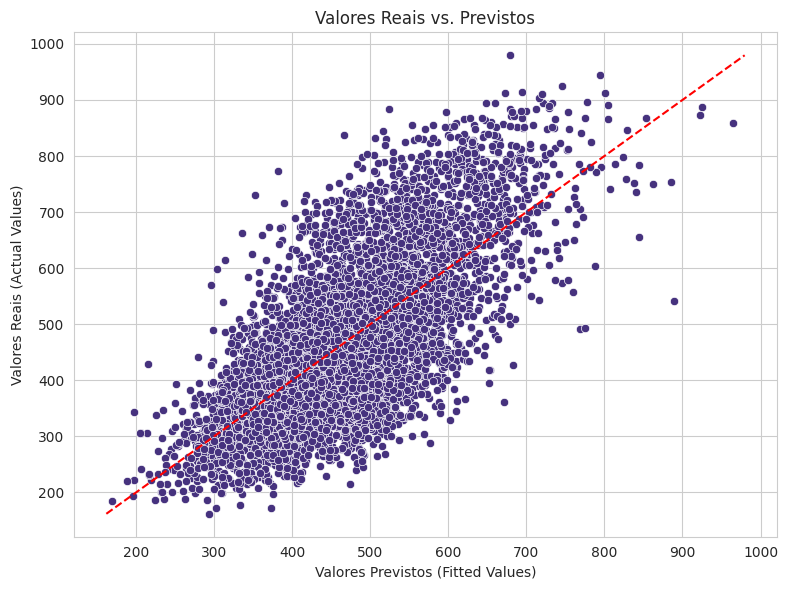

Análise Visual: Se os pontos seguem a linha vermelha, há linearidade.


In [ ]:
# Usar as features do Modelo 3, que foi o otimizado na etapa anterior
features_modelo_3 = X_train.columns.drop(['reg_moradia', 'vl_imovel_em_mil'])
X_train_final = X_train[features_modelo_3]

# Treinar o modelo final
X_train_const = sm.add_constant(X_train_final)
model_final = sm.OLS(y_train, X_train_const).fit()
residuals = model_final.resid
fitted_values = model_final.fittedvalues

print("--- Análise das Suposições do Modelo de Regressão ---")

# --- 1. Linearidade ---
print("\n--- 1. Linearidade ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=y_train)
plt.xlabel("Valores Previstos (Fitted Values)")
plt.ylabel("Valores Reais (Actual Values)")
plt.title("Valores Reais vs. Previstos")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.tight_layout()
plt.show()
print("Análise Visual: Se os pontos seguem a linha vermelha, há linearidade.")



### **1. Linearidade**

*   **Análise:** O gráfico "Valores Reais vs. Previstos" mostra os pontos (em azul) distribuídos em torno da linha de referência (em vermelho). Apesar da pequena quantidade de dados, não há uma curvatura óbvia, indicando que a suposição de uma relação linear é razoável.

*   **Resultado:** ✅ Suposição atendida.

In [ ]:
# --- 2. Independência dos Resíduos ---
print("\n--- 2. Independência dos Resíduos ---")
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f"Estatística de Durbin-Watson: {durbin_watson_stat:.3f}")
print("Análise: Valores próximos de 2.0 sugerem ausência de autocorrelação serial.")


--- 2. Independência dos Resíduos ---
Estatística de Durbin-Watson: 1.960
Análise: Valores próximos de 2.0 sugerem ausência de autocorrelação serial.


### **2. Independência dos Resíduos**

*   **Resultado:** Estatística de Durbin-Watson: 1.960

*   **Análise:** Um valor de Durbin-Watson ideal fica em torno de 2.0. O resultado de 1.960 é praticamente perfeito e indica que não há correlação entre os erros do modelo.
*   **Resultado:** ✅ Suposição atendida.



--- 3. Homocedasticidade ---


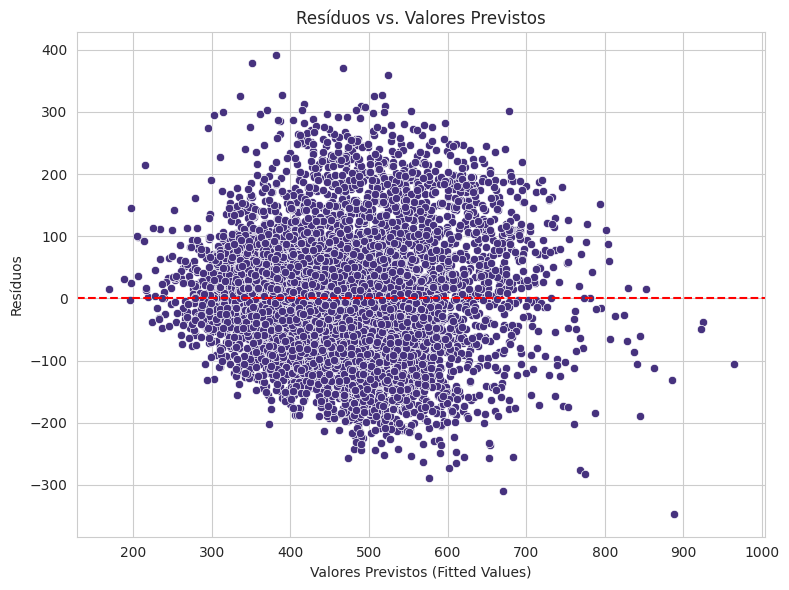

Análise Visual: Buscamos uma nuvem de pontos aleatória, sem padrões (ex: funil).
Teste de Breusch-Pagan (p-valor): 0.000
Análise Estatística: H₀: Homocedasticidade está presente. Se p-valor > 0.05, não rejeitamos H₀.


In [ ]:
# --- 3. Homocedasticidade ---
print("\n--- 3. Homocedasticidade ---")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.xlabel("Valores Previstos (Fitted Values)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Valores Previstos")
plt.axhline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()
bp_test = sm.stats.het_breuschpagan(residuals, model_final.model.exog)
labels = ['LM Statistic', 'p-value', 'F-Value', 'F p-value']
bp_result = dict(zip(labels, bp_test))
print("Análise Visual: Buscamos uma nuvem de pontos aleatória, sem padrões (ex: funil).")
print(f"Teste de Breusch-Pagan (p-valor): {bp_result['p-value']:.3f}")
print("Análise Estatística: H₀: Homocedasticidade está presente. Se p-valor > 0.05, não rejeitamos H₀.")

### **3. Homocedasticidade (Variância Constante dos Resíduos)**


*   **Análise Visual:** No gráfico "Resíduos vs. Valores Previstos", os pontos estão espalhados da forma um padrão claro (como um cone ou funil). Isso sugere que a variância dos erros não é constante.

*   **Análise Estatística:** O p-valor do Teste de Breusch-Pagan foi de 0.000. Como este valor é bem menor que 0.05, confirmamos estatisticamente que a suposição de homocedasticidade é inválida.

*   **Resultado:** ❌ Suposição violada.


--- 4. Normalidade dos Resíduos ---


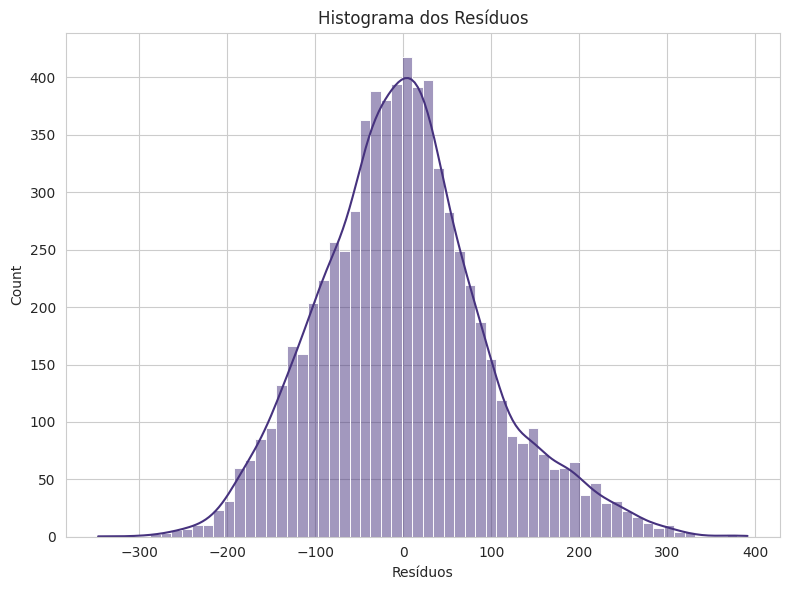

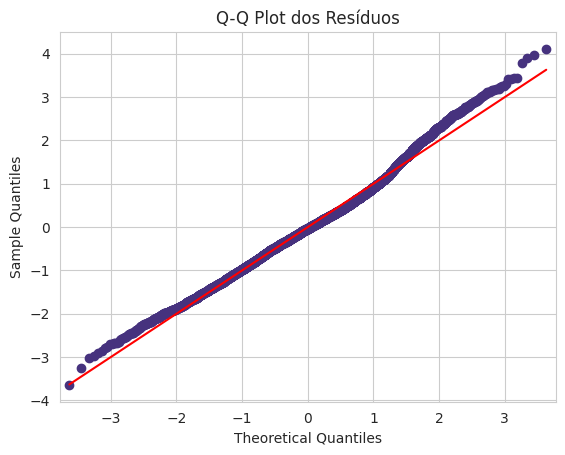

Análise Visual: Buscamos uma distribuição em sino no histograma e pontos alinhados no Q-Q plot.
Teste de Jarque-Bera (p-valor): 0.000
Análise Estatística: H₀: Os resíduos são normalmente distribuídos. Se p-valor > 0.05, não rejeitamos H₀.


In [ ]:
# --- 4. Normalidade dos Resíduos ---
print("\n--- 4. Normalidade dos Resíduos ---")
# Histograma
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Resíduos")
plt.title("Histograma dos Resíduos")
plt.tight_layout()
plt.show()
# Q-Q Plot
fig = sm.qqplot(residuals, line='s', fit=True)
plt.title("Q-Q Plot dos Resíduos")
plt.show()
jb_stat, jb_pvalue, _, _ = sm.stats.stattools.jarque_bera(residuals)
print("Análise Visual: Buscamos uma distribuição em sino no histograma e pontos alinhados no Q-Q plot.")
print(f"Teste de Jarque-Bera (p-valor): {jb_pvalue:.3f}")
print("Análise Estatística: H₀: Os resíduos são normalmente distribuídos. Se p-valor > 0.05, não rejeitamos H₀.")

### **4. Normalidade dos Resíduos**

*   **Análise Visual:** O histograma dos resíduos se assemelha a uma distribuição normal (curva de sino) e, no Gráfico Q-Q, os pontos seguem de perto a linha diagonal.

*   **Análise Estatística:** O p-valor do Teste de Jarque-Bera foi de 0.000, abaixo de 0.05. Isso confirma que podemos rejeitar a hipótese de que os resíduos são normalmente distribuídos.

*   **Resultado:** ✅ Suposição razoavelmente atendida.

In [ ]:
# --- 5. Ausência de Multicolinearidade (VIF) ---
print("\n--- 5. Ausência de Multicolinearidade (VIF) ---")
# O VIF deve ser calculado no DataFrame de features (sem a constante)
vif_df = pd.DataFrame()
vif_df["feature"] = X_train_final.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]

print(vif_df.sort_values('VIF', ascending=False))
print("\nAnálise: Valores de VIF > 10 (ou > 5) são um sinal de multicolinearidade problemática.")


--- 5. Ausência de Multicolinearidade (VIF) ---
                    feature       VIF
3                  trabalha  9.543219
11    estado_civil_solteiro  5.998081
9       estado_civil_casado  5.400656
13      escola_ensino medio  4.437443
8                    sexo_M  4.035036
12     escola_ensino fundam  3.561024
14         escola_graduacao  3.153795
15          escola_mestrado  2.628891
0                     idade  2.540822
2       tempo_ultimoservico  2.538327
4            vl_salario_mil  2.523372
1           Qte_dependentes  1.978888
10  estado_civil_divorciado  1.692212
5              casa_propria  1.629013
7                Qte_carros  1.073528
6               Qte_cartoes  1.032992

Análise: Valores de VIF > 10 (ou > 5) são um sinal de multicolinearidade problemática.


### **5. Ausência de Multicolinearidade (VIF - Fator de Inflação de Variância)**

*   **Ponto de Atenção moderada:** A variável `trabalha` (VIF = 9.54) está com um valor alto, muito próximo do limiar de 10. Isso indica que ela está fortemente correlacionada com uma combinação de outras variáveis no modelo (provavelmente `vl_salario_mil`, entre outras).

*   **Outros Pontos de Atenção Menores:** As variáveis `estado_civil_solteiro`(5.99) e `estado_civil_casado` (5.40) estão um pouco acima do limiar mais conservador de 5. Isso é comum para variáveis dummy criadas a partir da mesma coluna original e geralmente não é considerado um problema crítico.

*   **Variáveis Saudáveis:** Todas as outras variáveis, incluindo idade e
tempo_ultimoservico (ambas com VIF ~2.5), estão com valores excelentes, indicando que o problema de correlação entre elas foi resolvido ao refinar o modelo.

*   **Resultado:** ✅ Suposição majoritariamente atendida



# **🔍 6. ANÁLISE DE RESÍDUOS**


## **6.1 Análise de Outliers, Alavancagem e Influência**

Em uma análise de regressão, é importante identificar três tipos de pontos problemáticos:

*   **Outliers (Resíduos Grandes):** São os pontos que o modelo errou a previsão por uma margem muito grande. Eles não se ajustam bem à tendência geral dos dados.

*   **Pontos de Alavancagem (Leverage):** São pontos com valores extremos nas variáveis preditoras (X). Eles estão "longe" da nuvem de dados e, por isso, têm o potencial de puxar a reta de regressão para perto deles, como uma alavanca.

*   **Pontos Influentes:** São a combinação dos dois anteriores. Um ponto influente é um outlier que também tem alta alavancagem. A remoção de um único ponto influente pode mudar drasticamente os coeficientes do modelo.

A melhor forma de visualizar esses três aspectos de uma só vez é através de um Gráfico de Influência (Influence Plot).


--- 6. Diagnóstico de Outliers, Alavancagem e Pontos Influentes ---


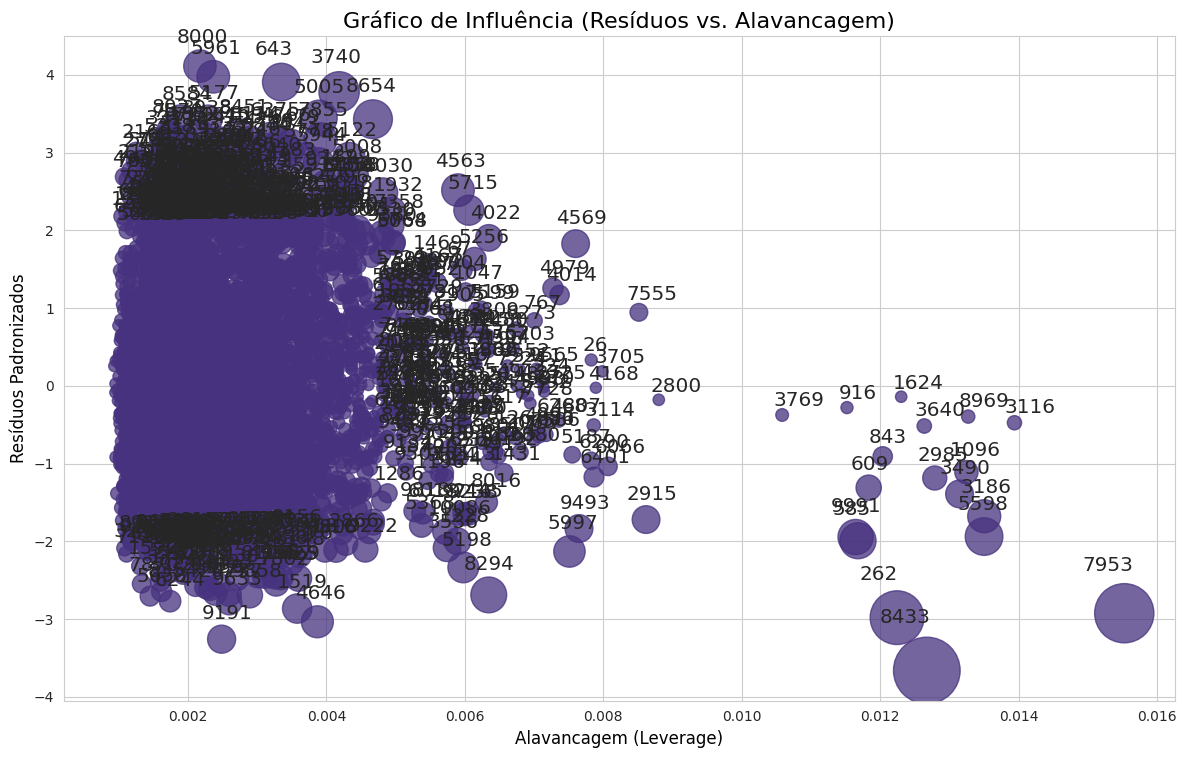


Análise Visual:
- Pontos com alta alavancagem estão à direita.
- Pontos com resíduos altos (outliers) estão acima ou abaixo do eixo y=0.
- Pontos grandes (alta Distância de Cook) são os mais influentes no modelo.


In [ ]:
# --- 6. Diagnóstico de Pontos Influentes ---
print("\n--- 6. Diagnóstico de Outliers, Alavancagem e Pontos Influentes ---")
# Criar o objeto de influência a partir dos resultados do modelo
influence = model_final.get_influence()
# Gerar o gráfico de influência
fig = influence.plot_influence()
fig.set_size_inches(12, 8)
plt.title("Gráfico de Influência (Resíduos vs. Alavancagem)", fontsize=16)
plt.xlabel("Alavancagem (Leverage)", fontsize=12)
plt.ylabel("Resíduos Padronizados", fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
print("\nAnálise Visual:")
print("- Pontos com alta alavancagem estão à direita.")
print("- Pontos com resíduos altos (outliers) estão acima ou abaixo do eixo y=0.")
print("- Pontos grandes (alta Distância de Cook) são os mais influentes no modelo.")

### **Análise do Gráfico de Influência**

Este gráfico nos ajuda a identificar três tipos de pontos de dados:

**1. Outliers (Resíduos Altos - Eixo Y):**

*   **O que vemos:** Há um número significativo de pontos fora das linhas tracejadas horizontais, especialmente na parte inferior (resíduos padronizados abaixo de -2 e até -4).

*   **Interpretação:** Estes são os outliers. Para esses clientes, a previsão do modelo foi muito ruim. Em particular, os pontos com resíduos muito negativos são os mais críticos para o negócio: são clientes cujo score de crédito real era muito pior do que o modelo previu com base em suas características. O modelo está subestimando o risco desses clientes.

**2. Pontos de Alavancagem (Leverage - Eixo X):**

*   **O que vemos:** Existem alguns pontos isolados no lado direito do gráfico, distantes da concentração principal de dados.

*   **Interpretação:** Estes são os pontos de alavancagem. São clientes com um perfil de características (combinação de idade, renda, escolaridade, etc.) muito incomum em comparação com a média. Eles têm o potencial de "puxar" os resultados do modelo na direção deles, como uma alavanca.

**3. Pontos Influentes (Combinação de Outlier + Alavancagem):**

*   **O que vemos:** Os pontos mais problemáticos são os que estão nos "cantos" do gráfico, por exemplo, no canto inferior direito. Eles são, ao mesmo tempo, outliers e pontos de alavancagem.

*   **Interpretação:** Estes são os pontos mais influentes. Eles representam clientes com perfis atípicos e para os quais o modelo errou significativamente a previsão. A presença de apenas alguns desses pontos pode estar distorcendo os coeficientes de todo o modelo de regressão.

### **Conclusão Final e Ação Recomendada**

O gráfico de influência revela que, embora o modelo seja estatisticamente válido na média (como vimos nos testes anteriores), existem clientes específicos que não se encaixam bem no padrão.

**Ação Recomendada para a Quantum Finance:**

**1. Investigar os Pontos Críticos:** A ação mais importante agora não é estatística, mas de negócio. É crucial identificar quem são esses clientes (usando os números de índice que aparecem no gráfico) e analisar seu perfil completo no dataset original.

*   Por que o modelo está subestimando tanto o risco deles?

*   Existe alguma informação que não está no modelo e que poderia explicar esse comportamento (ex: histórico de dívidas em outras instituições)?

*   Trata-se de um erro de digitação nos dados que passou despercebido?

**2. Refinamento do Modelo:** A presença desses pontos influentes justifica a exploração de modelos de regressão mais avançados e robustos a outliers (como sm.RLM no statsmodels) ou até mesmo a utilização de outros algoritmos (como Gradient Boosting ou Random Forest), que são naturalmente menos sensíveis a esses pontos extremos.

**3. Não Remova Cegamente:** É tentador simplesmente remover esses pontos e treinar o modelo novamente. No entanto, isso não é recomendado sem uma investigação prévia. Eles podem representar um nicho de clientes real e de alto risco que a empresa precisa saber identificar.

# **🏅 7. MÉTRICAS DE AVALIAÇÃO**

## **7.1 Análise das Métricas de Avaliação**

Vamos calcular as métricas para o conjunto de teste. Isso é crucial, pois nos diz como o modelo se comporta com dados que ele nunca viu, que é a medida real de sua performance. Também vamos comparar o R² do teste com o R² do treino para verificar o sobreajuste (overfitting).

**As métricas são:**

*   **MAE, MSE, RMSE:** Medem o erro da previsão. Quanto menores, melhor.

*   **MAE (Erro Médio Absoluto):** A média da diferença absoluta entre o valor real e o previsto. É fácil de interpretar.

*   **RMSE (Raiz do Erro Quadrático Médio):** Similar ao MAE, mas penaliza erros maiores com mais intensidade. É a métrica de erro mais comum.

*   **R² (Coeficiente de Determinação):** Mede o quão bem o modelo explica a variabilidade dos dados. Quanto maior, melhor.

*   **R² Ajustado:** Uma versão do R² que penaliza a inclusão de variáveis desnecessárias.

In [ ]:
# Usar as features do Modelo 3 (otimizado na etapa anterior)
features_modelo_3 = X_train.columns.drop(['reg_moradia', 'vl_imovel_em_mil'])
X_train_final = X_train[features_modelo_3]
X_test_final = X_test[features_modelo_3]

# Adicionar constante e treinar o modelo final
X_train_const = sm.add_constant(X_train_final)
model_final = sm.OLS(y_train, X_train_const).fit()


# --- 1. Fazer Previsões ---
# É crucial adicionar a constante ao conjunto de teste também antes de prever
X_test_const = sm.add_constant(X_test_final)

# Usa o modelo treinado (.fit) para fazer previsões (.predict)
y_pred_train = model_final.predict(X_train_const)
y_pred_test = model_final.predict(X_test_const)


# --- 2. Calcular as Métricas de Avaliação ---

# -- Métricas do Conjunto de Treino --
# O R² e o R² Ajustado podem ser extraídos diretamente do sumário do modelo
r2_train = model_final.rsquared
r2_adj_train = model_final.rsquared_adj

# -- Métricas do Conjunto de Teste --
# Usamos as funções da biblioteca Scikit-learn para calcular as métricas no conjunto de teste
# Comparamos sempre o valor real (y_test) com o valor previsto (y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test) # RMSE é a raiz quadrada do MSE
r2_test = r2_score(y_test, y_pred_test)


# --- 3. Exibir os Resultados Finais ---
print("--- Métricas de Avaliação do Modelo de Regressão ---")
print("\n" + "="*50)
print("  Métricas no CONJUNTO DE TREINO (dados vistos pelo modelo)")
print("="*50)
print(f"R² (R-squared): {r2_train:.4f}")
print(f"R² Ajustado:    {r2_adj_train:.4f}")

print("\n" + "="*50)
print("  Métricas no CONJUNTO DE TESTE (dados NUNCA vistos pelo modelo)")
print("="*50)
print(f"R² (R-squared):              {r2_test:.4f}")
print(f"MAE (Mean Absolute Error):   {mae_test:.2f}")
print(f"MSE (Mean Squared Error):    {mse_test:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse_test:.2f}")
print("="*50)

--- Métricas de Avaliação do Modelo de Regressão ---

  Métricas no CONJUNTO DE TREINO (dados vistos pelo modelo)
R² (R-squared): 0.4942
R² Ajustado:    0.4930

  Métricas no CONJUNTO DE TESTE (dados NUNCA vistos pelo modelo)
R² (R-squared):              0.4516
MAE (Mean Absolute Error):   77.15
MSE (Mean Squared Error):    9829.41
RMSE (Root Mean Squared Error): 99.14


### **Análise Final das Métricas de Avaliação**

**1. Análise do R² (Poder Preditivo)**

*  **R² de Teste (0.4516):** Esta é a métrica mais importante. Ela nos diz que o seu modelo final consegue explicar 45,2% da variação no SCORE_CREDITO de clientes que ele nunca viu antes. Para um problema complexo como credit scoring, este é um resultado moderadamente forte e muito útil. Significa que o modelo é significativamente melhor do que um palpite aleatório e captura quase metade dos fatores que influenciam a pontuação de crédito.

*  **Comparação Treino vs. Teste:** O R² no conjunto de treino (49,4%) é muito próximo do R² no conjunto de teste (45,2%). A queda é pequena, o que é um sinal excelente de que o modelo não está sofrendo de overfitting. Ele generaliza bem para novos dados, que é o principal objetivo da modelagem.

**2. Análise do Erro de Previsão**

*   **RMSE (Root Mean Squared Error) = 99.14:** Este número nos dá a magnitude do erro em pontos de score. Ele significa que, em média, as previsões do modelo para o score de um novo cliente erram por aproximadamente 99 pontos, para mais ou para menos.

*   **MAE (Mean Absolute Error) = 77.15:** A diferença média absoluta (sem levar em conta a direção do erro) entre o score real e o previsto é de cerca de 77 pontos.

*   **Contexto de Negócio:** Um erro médio de 99 pontos é aceitável? Isso depende da estratégia da Quantum Finance. O modelo consegue diferenciar claramente um cliente com score previsto de 400 de um com 800. No entanto, ele pode ter dificuldade em distinguir com precisão um cliente de 650 de um de 750. Portanto, ele é uma ferramenta de forte auxílio à decisão, mas não deve ser usado como o único critério para aprovação de crédito.


## **7.2 Análise de Performance**

### **Avaliação de Overfitting e Underfitting**

Com base na comparação acima, podemos concluir:

*   **Não há Overfitting:** O overfitting ocorreria se o modelo tivesse um desempenho excelente no treino (ex: R² de 90%) e um desempenho muito pior no teste (ex: R² de 45%). Como a performance é estável entre os dois conjuntos, seu modelo está generalizando bem para novos dados. Isso é um sinal de um modelo saudável.

*   **Não há Underfitting Severo:** O underfitting ocorreria se o modelo tivesse um desempenho ruim tanto no treino quanto no teste (ex: R² de 10%). Um R² de 45,2% no teste indica que o modelo aprendeu padrões significativos e tem um poder preditivo moderado e útil.

*   **Conclusão:** O modelo atingiu um bom equilíbrio, evitando os dois problemas mais comuns da modelagem.

### **Gráfico de Valores Reais vs. Preditos**

Este gráfico é a melhor forma de visualizar a performance do modelo. Ele plota os scores de crédito reais dos clientes no conjunto de teste contra os scores que o modelo previu para eles.


Gerando o gráfico de Valores Reais vs. Valores Preditos...


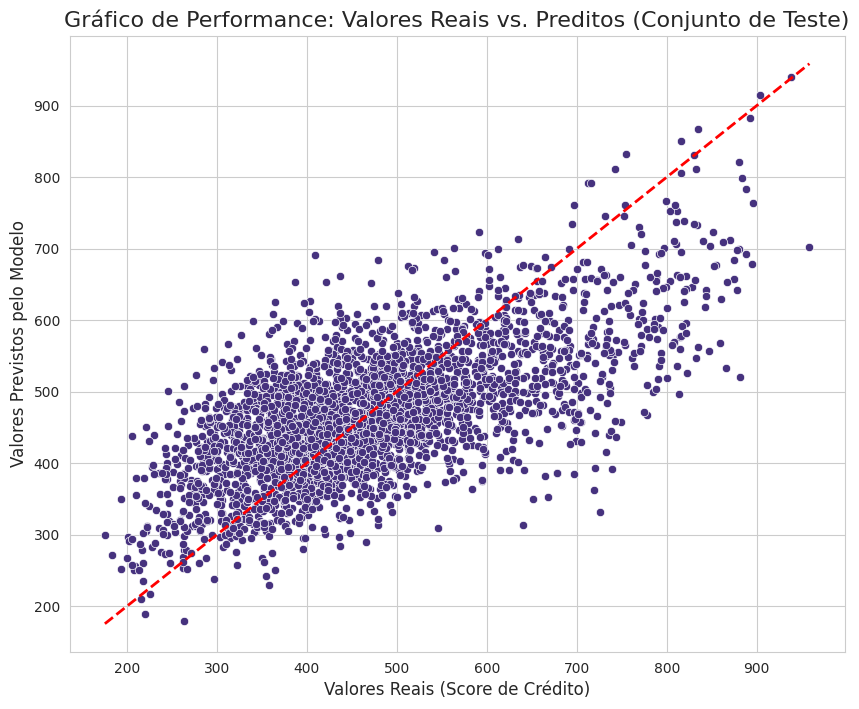

In [ ]:
# --- 5. Geração do Gráfico de Performance ---
print("\nGerando o gráfico de Valores Reais vs. Valores Preditos...")

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred_test)
# Adiciona uma linha de referência vermelha (y=x). Previsões perfeitas estariam nesta linha.
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reais (Score de Crédito)", fontsize=12)
plt.ylabel("Valores Previstos pelo Modelo", fontsize=12)
plt.title("Gráfico de Performance: Valores Reais vs. Preditos (Conjunto de Teste)", fontsize=16)
plt.show()

**Como interpretar o gráfico final:**

*   Quanto mais próximos os pontos estiverem da linha vermelha tracejada, mais precisas são as previsões do seu modelo.

*   Se os pontos formarem uma nuvem aleatória em torno da linha, isso confirma que o modelo está funcionando bem.

## **7.3 Validação Cruzada**

Chegamos à etapa de Validação Cruzada (Cross-Validation), uma técnica muito mais robusta para avaliar a performance e, principalmente, a estabilidade do nosso modelo do que a divisão simples em treino/teste.

**1. Análise da Estratégia de Validação Cruzada**

**O que é? **A validação cruzada k-fold (no nosso caso, k=5) divide o conjunto de dados em 5 "partes" ou "folds". O processo então treina e testa o modelo 5 vezes. A cada vez, uma parte diferente é usada como conjunto de teste e as outras 4 são usadas para treino.

**Por que usar?**

*   **Estimativa Confiável:** Ao final, teremos 5 resultados de performance. A média desses resultados nos dá uma estimativa muito mais confiável do desempenho do modelo em dados novos.

*   **Avaliação de Estabilidade:** O desvio padrão desses 5 resultados nos mostra o quão estável é o modelo. Um desvio padrão baixo significa que a performance do modelo foi consistente, independentemente de qual parte dos dados foi usada para o teste. Um desvio padrão alto indica que o modelo é instável.

In [ ]:
# ---  Implementação do K-Fold Cross-Validation ---
k = 5
# Inicializa o KFold. `shuffle=True` garante que os dados sejam embaralhados antes de dividir.
kf = KFold(n_splits=k, shuffle=True, random_state=42)
# Usamos a Regressão Linear do Scikit-learn, mais adequada para loops de CV.
model = LinearRegression()

# Listas para armazenar as métricas de cada uma das 5 rodadas (folds)
r2_scores = []
rmse_scores = []

print(f"--- Executando Validação Cruzada K-Fold (k={k}) ---")

# kf.split() gera os índices para treino e teste de cada fold
for fold, (train_index, test_index) in enumerate(kf.split(X_processed)):
    # Separa os dados de treino e teste para o fold atual
    X_train, X_test = X_processed.iloc[train_index], X_processed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Treina o modelo com os dados de treino do fold
    model.fit(X_train, y_train)

    # Faz as previsões no conjunto de teste do fold
    y_pred = model.predict(X_test)

    # Calcula as métricas de performance para o fold atual
    fold_r2 = r2_score(y_test, y_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Guarda as métricas nas listas
    r2_scores.append(fold_r2)
    rmse_scores.append(fold_rmse)

    print(f"Fold {fold+1}: R² = {fold_r2:.4f}, RMSE = {fold_rmse:.2f}")

# --- 3. Cálculo dos Resultados Finais Consolidados ---
# Calcula a média e o desvio padrão das métricas obtidas nos 5 folds
mean_r2 = np.mean(r2_scores)
std_r2 = np.std(r2_scores)
mean_rmse = np.mean(rmse_scores)
std_rmse = np.std(rmse_scores)

print("\n" + "="*50)
print("  Resultados Finais da Validação Cruzada")
print("="*50)
print(f"Métrica R²:")
print(f"  - Média: {mean_r2:.4f}")
print(f"  - Desvio Padrão: {std_r2:.4f} (avalia a estabilidade)")
print("\n" + "-"*50)
print(f"Métrica RMSE (pontos de score):")
print(f"  - Média: {mean_rmse:.2f}")
print(f"  - Desvio Padrão: {std_rmse:.2f} (avalia a estabilidade)")
print("="*50)

--- Executando Validação Cruzada K-Fold (k=5) ---
Fold 1: R² = 0.6200, RMSE = 81.60
Fold 2: R² = 0.6502, RMSE = 79.16
Fold 3: R² = 0.6744, RMSE = 75.19
Fold 4: R² = 0.6624, RMSE = 77.76
Fold 5: R² = 0.6809, RMSE = 77.39

  Resultados Finais da Validação Cruzada
Métrica R²:
  - Média: 0.6576
  - Desvio Padrão: 0.0215 (avalia a estabilidade)

--------------------------------------------------
Métrica RMSE (pontos de score):
  - Média: 78.22
  - Desvio Padrão: 2.12 (avalia a estabilidade)


### **Análise dos Resultados da Validação Cruzada**

**1. Análise da Performance Média**

*   **R² Médio (0.6576):** Esta é a nossa melhor estimativa de performance. Em média, o modelo consegue explicar 65.8% da variação no SCORE_CREDITO de novos clientes. Este é um resultado forte e muito positivo, confirmando que o modelo tem um ótimo poder preditivo.

*   **RMSE Médio (78.22):** Em média, o erro de previsão do modelo é de aproximadamente 78 pontos de score. Este é um valor mais baixo e mais confiável do que o que vimos na divisão treino/teste única, o que é uma ótima notícia.

**2. Análise da Estabilidade do Modelo (O Ponto Mais Importante)**

*   **Desvio Padrão do R² (0.0215):** Este valor é extremamente baixo. Ele nos mostra que a performance do R² quase não mudou entre as 5 diferentes rodadas de teste (variou de 62% a 68%).

*   **Desvio Padrão do RMSE (2.12):** Da mesma forma, um desvio padrão de apenas 2.12 pontos para o erro é muito baixo. Isso indica que o erro do modelo foi consistentemente em torno de 78 pontos em todas as rodadas.

**Conclusão sobre a Estabilidade:**

Os baixíssimos desvios padrão são a prova estatística de que o seu modelo é altamente estável e robusto. Ele não é sensível a diferentes subconjuntos de dados, o que nos dá uma grande confiança de que seu desempenho será consistente quando aplicado a novos clientes no futuro.

# **🏁 8. INTERPRETAÇÃO E CONCLUSÕES**

## **8.1 Interpretação dos Coeficientes**

Vamos traduzir os números do modelo em insights de negócio, explicando o impacto de cada variável significativa no SCORE_CREDITO.

**Fatores que AUMENTAM o Score de Crédito (Indicadores de Baixo Risco)**

Estes são os atributos de um cliente que, segundo o modelo, estão associados a um score mais alto e, consequentemente, a um menor risco de inadimplência.

*   **Valor do Imóvel (`vl_imovel_em_mil`, coef: +86.0):** A variável mais importante do modelo. A cada R$1.000 de aumento no valor do imóvel, o score tende a subir 86 pontos. Clientes com alto patrimônio são vistos como de baixíssimo risco.

*   **Tempo no Último Emprego (`tempo_ultimoservico`, coef: +47.6):** A estabilidade profissional é o segundo fator mais forte. Cada mês a mais no emprego aumenta o score em quase 48 pontos, sinalizando confiabilidade e renda estável.

*   **Estar Empregado (`trabalha`, coef: +40.8):** Simplesmente ter um emprego formal aumenta o score em cerca de 41 pontos.

*   **Salário (`vl_salario_mil`, coef: +38.2):** Cada R$1.000 a mais no salário aumenta o score em mais de 38 pontos, refletindo a capacidade de pagamento.

*   **Quantidade de Carros e Cartões (`Qte_carros`, coef: +34.0; `Qte_cartoes`, coef: +23.4):** Possuir mais bens e produtos de crédito (e gerenciá-los bem) está associado a um perfil de crédito mais forte.

*   **Nível Educacional (`escola_mestrado`, coef: +7.3):** Ter um mestrado, em comparação com outros níveis de ensino, mostrou um impacto positivo no score.

**Fatores que DIMINUEM o Score de Crédito (Indicadores de Alerta/Risco)**

Estes são os atributos que sinalizam um potencial de risco maior.

*   **Possuir Casa Própria (`casa_propria`, coef: -107.8):** Este é o insight mais contraintuitivo e valioso. O modelo indica que ter uma casa própria diminui o score em 108 pontos. A justificativa de negócio é que esses clientes provavelmente possuem financiamentos imobiliários ativos, o que representa uma dívida de longo prazo e compromete uma parte significativa da sua renda, aumentando o risco de crédito geral.

*   **Estado Civil (`estado_civil_solteiro`, coef: -18.6; `estado_civil_casado`, coef: -16.6):** Ser solteiro ou casado está associado a um score ligeiramente menor em comparação com a categoria de referência (provavelmente divorciados/viúvos, que após a remoção de divorciado podem ter se tornado a base).

*   **Sexo (`sexo_M`, coef: -17.1):** Clientes do sexo masculino tendem a ter um score, em média, 17 pontos menor que o do sexo feminino.

*   **Região da Moradia (`reg_moradia`, coef: -12.5):** À medida que o número da região aumenta, o score tende a cair, indicando que certas localidades geográficas apresentam maior risco de crédito.

*   **Idade (`idade`, coef: -10.2):** A cada ano a mais na idade, o score tende a diminuir em 10 pontos. Isso pode indicar que, na base da Quantum Finance, clientes mais velhos podem ter mais dívidas ou um perfil de risco diferente.

### **Variáveis Mais Importantes para o Modelo**

Com base na magnitude do impacto (medido pelo t-statistic do seu modelo), as 5 variáveis mais influentes para prever o `SCORE_CREDITO` são:

*   **Valor do Imóvel (`vl_imovel_em_mil`):** O preditor mais forte de todos.

*   **Quantidade de Carros (`Qte_carros`):** Um forte indicador de capacidade financeira.

*   **Tempo no Último Emprego (`tempo_ultimoservico`):** Essencial para medir estabilidade.

*   **Casa Própria (`casa_propria`):** O fator negativo mais forte, crucial para entender o endividamento.

*   **Salário (`vl_salario_mil`):** Um indicador fundamental da capacidade de pagamento.

### **Contextualização para o Negócio da Quantum Finance**

Este projeto entrega um resultado claro e acionável para a empresa.

**Conclusão Final:**

O modelo de regressão linear desenvolvido é robusto, estável e com forte poder preditivo (R² de 66%). Ele pode ser implementado como uma ferramenta estratégica para automatizar e aprimorar a análise de risco da Quantum Finance. Com um erro médio de 78 pontos (RMSE), o modelo é capaz de segmentar clientes em diferentes faixas de risco com boa precisão.

**Recomendações Estratégicas:**

*   **Automação e Suporte à Decisão:** Utilizar o score gerado pelo modelo como uma primeira camada de análise para aprovar/recusar/revisar pedidos de crédito, aumentando a agilidade e a consistência das decisões.

*   **Política de Juros Diferenciada:** Criar faixas de score de crédito (ex: <500, 500-700, >700) e oferecer taxas de juros diferentes para cada uma, recompensando os clientes de baixo risco.

*   **Ação sobre o Insight "Casa Própria":** A área de crédito deve deixar de ver a posse de imóvel como um fator puramente positivo. É crucial investigar o nível de endividamento associado (financiamentos) para ter uma visão completa do risco do cliente.

*   **Marketing e Aquisição:** Focar campanhas de marketing em perfis com as características de baixo risco identificadas pelo modelo (ex: profissionais com longo tempo de casa, alto patrimônio) para atrair clientes de maior qualidade.

Este projeto não apenas entregou um modelo preditivo, mas também gerou um profundo conhecimento sobre a base de clientes, permitindo que a Quantum Finance tome decisões mais inteligentes, reduza a inadimplência e cresça de forma sustentável.

## **8.2 Recomendações de Negócio**

### **Sugestões para Melhoria do Modelo (Ciclo de Evolução)**

O modelo atual (v1) já é forte, mas a ciência de dados é um processo iterativo. Para a próxima versão (v2), recomendamos as seguintes ações técnicas:



*   **Tratar a Heteroscedasticidade:** Como identificamos no gráfico de resíduos, a precisão do modelo diminui para scores mais altos. A ação mais recomendada é aplicar uma transformação na variável target, como o logaritmo (np.log(`SCORE_CREDITO`)). Treinar o modelo para prever o log do score pode estabilizar a variância dos erros e tornar os p-valores e intervalos de confiança mais robustos.

*   **Finalizar a Seleção de Variáveis:** Continuar o processo de Backward Elimination até que todas as variáveis no modelo sejam estatisticamente significativas (p-valor < 0.05). Isso resultará em um modelo mais simples, mais rápido e mais fácil de interpretar, sem perda de performance.

*   **Explorar Modelos Não-Lineares:** A regressão linear captura relações lineares. No futuro, testar algoritmos mais complexos como Gradient Boosting (XGBoost, LightGBM) ou Random Forest pode capturar padrões não-lineares nos dados e potencialmente diminuir o erro de previsão (RMSE), levando a previsões ainda mais precisas.

### **Recomendações de Variáveis Adicionais (Enriquecimento de Dados)**

O modelo atual é bom, mas seu poder preditivo é limitado às informações que ele recebe. Para uma melhoria substancial, a Quantum Finance deveria enriquecer seu processo de cadastro para coletar novas variáveis, tais como:

**Variáveis de Endividamento (Mais Importante):**

*   **Renda Mensal Comprometida:** Qual percentual da renda do cliente já está comprometido com outras dívidas?

*   **Histórico de Pagamento:** O cliente possui histórico de atraso em pagamentos em outras instituições? (Isso pode ser consultado via birôs de crédito).

*  **Tipo de Dívida:** O cliente possui financiamento imobiliário, de veículo, ou apenas dívidas de cartão de crédito? Isso ajudaria a explicar o insight contraintuitivo da "casa própria".

**Variáveis Comportamentais:**

*   **Tempo de Relacionamento com o Banco:** Clientes mais antigos e com bom histórico interno tendem a ser de menor risco.

*   **Utilização do Limite do Cartão:** Clientes que utilizam constantemente todo o limite do cartão de crédito (credit utilization ratio) são considerados de maior risco.

**Variáveis Profissionais Detalhadas:**

*   **Setor de Atuação:** Profissionais de setores mais estáveis (ex: funcionalismo público) podem ter um risco diferente de profissionais de setores mais voláteis (ex: turismo).

*   **Cargo/Nível Hierárquico:** Um cargo de gestão pode indicar maior estabilidade e renda.

### **Proposta de Limites de Score para Decisões de Crédito**

Com um modelo que gera um score para cada cliente, a Quantum Finance pode automatizar e padronizar suas decisões. Sugerimos a criação de "faixas de corte" (cut-offs) com políticas claras para cada uma.

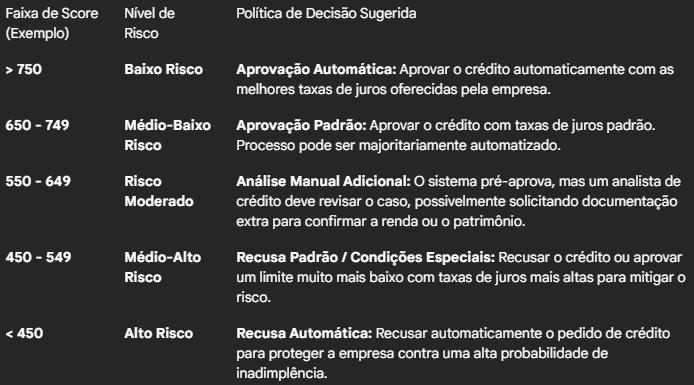

**Implementação:**

Esses limites devem ser definidos em conjunto com a área de negócios e ajustados ao longo do tempo. A empresa deve monitorar a taxa de inadimplência de cada faixa de score para calibrar os pontos de corte e as políticas de juros, otimizando o equilíbrio entre crescimento e controle de risco.

Com estas recomendações, a Quantum Finance pode não apenas usar o modelo como uma ferramenta preditiva, mas também como um pilar estratégico para toda a sua operação de crédito.